# Complex case compartment model solution

This notebook combines the compartment model of a 90 m3 STR bioreactor from Nadal-Rey et al. 2021 with the kinetic black box model of E. coli's overflow metabolism from Xu et al. 1999.

## Loading Libraries and modules

In [ ]:
from cmodels.cc_cmodel import cc_cmodel
from cmodels.cc_cmodel_sol import cc_cmodel_sol
from mmodels.xu_bb.cc_xu_bb import cc_xu_bb

In [2]:
import pandas as pd
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import seaborn as sns

## Demonstration of compartment model solution

### Loading compartment model

In [3]:
STR_LS_GNR = cc_cmodel(excel_path='cmodels/cmodel_files/RTD_LS/9_RTD_LS.xlsx')

In [4]:
complex_mmodel = cc_xu_bb(
    strain_id='Xu et al. 1999 literature strain',
    strain_description='WT E. coli'
)

complex_mmodel.define_strain_params(
    qS_max=1.3,
    qm_max=0.04,
    qA_c_max=0.15,
    qO_max=15,
    Ysx_ox=0.5,
    Ysx_of=0.15,
    Ysa=0.667,
    Yax=0.4,
    Ki_s=5,
    Ks=0.05,
    Ka=0.05,
    Ki_o=4
)

### Solving compartment model

In [11]:
## Feed calculator depending on biomass concentration
y0_1d = [
    0.0, #S 
    0.2095, #O
    0 #A
    ]

# multiply initial values with the number of compartments
y0 = y0_1d*len(STR_LS_GNR.CompVolumes)
# simulation time
t_eval=np.linspace(0,40,20001)
# Biomass concentration 
X = 45 # to keep things consistent: A biomass concentration of 40 g/L was chosen for Ys = 0.5; hence Ysx = 0.52 should result in 41.6. This is to keep the glucose feed rate constant accross different examples. 
# Growth rate for the fed-batch
mu_set = 0.05
# Liquid volume in the whole reactor
VL = (STR_LS_GNR.CompVolumes.CompVol - STR_LS_GNR.CompVolumes.CompVol*STR_LS_GNR.GH.GH).sum()
# Biomass yield
#Ysx = complex_mmodel.Ysx_ox
Ysx=0.46
# Glucose feed rate
Fs_feed = mu_set/Ysx*X*VL*1000
#Fs_feed=0.1*VL
# compartment model instance
cmodel = STR_LS_GNR
Fs_feed

399397.2354442899

Hello


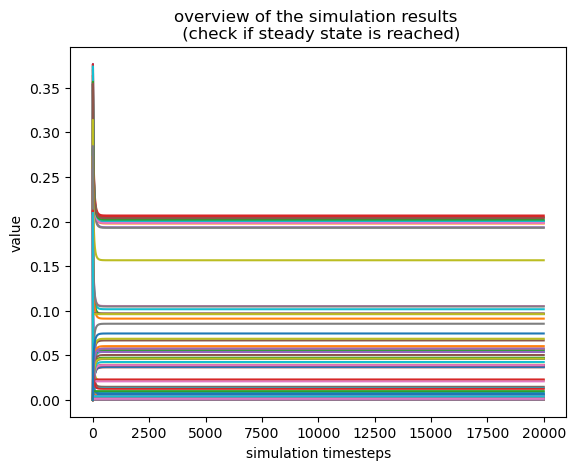

In [24]:
y0_1d = [
    0.0, #S 
    0.2095, #O
    0 #A
    ]

# multiply initial values with the number of compartments
y0 = y0_1d*len(STR_LS_GNR.CompVolumes)
# simulation time
t_eval=np.linspace(0,40,20001)
# Biomass concentration 
X = 35 # to keep things consistent: A biomass concentration of 40 g/L was chosen for Ys = 0.5; hence Ysx = 0.52 should result in 41.6. This is to keep the glucose feed rate constant accross different examples. 
# Growth rate for the fed-batch
mu_set = 0.05
# Liquid volume in the whole reactor
VL = (STR_LS_GNR.CompVolumes.CompVol - STR_LS_GNR.CompVolumes.CompVol*STR_LS_GNR.GH.GH).sum()
# Biomass yield
#Ysx = complex_mmodel.Ysx_ox
Ysx=0.46
# Glucose feed rate
Fs_feed = mu_set/Ysx*X*VL*1000
#Fs_feed=0.1*VL
# compartment model instance
cmodel = STR_LS_GNR

sol = cc_cmodel_sol(
    y0 = y0,
    t_eval = t_eval, 
    mmodel = complex_mmodel, 
    cmodel = cmodel, 
    X = X, 
    Fs_feed = Fs_feed
)

C:\Users\s210212\Documents\DTU\Thesis\Python_code\Xu_IF_allvol\cmodels\cc_cmodel_sol.py:59: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = mpl.pyplot.subplots(figsize=(2.5, 11))


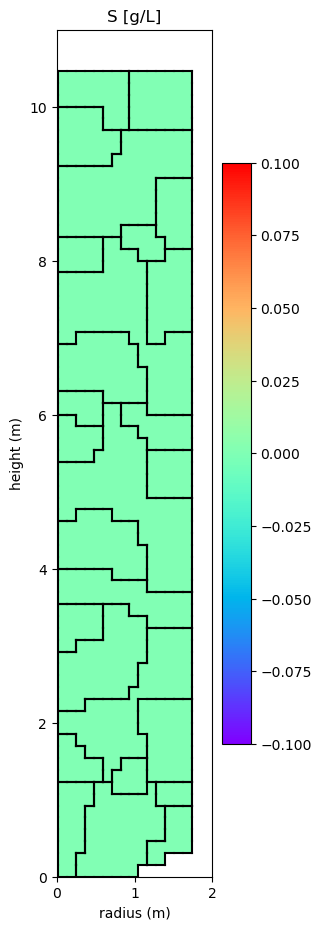

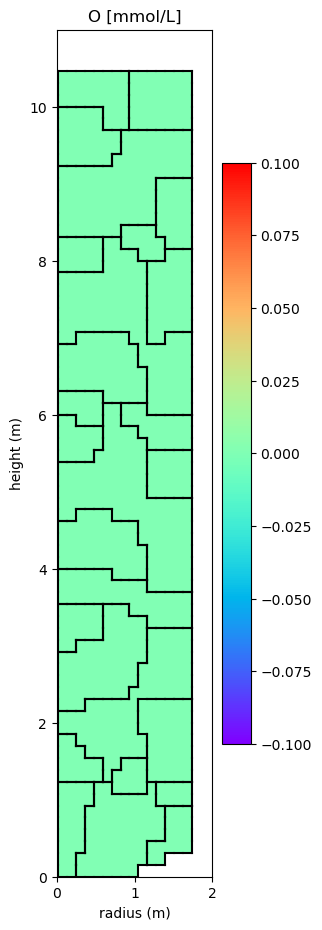

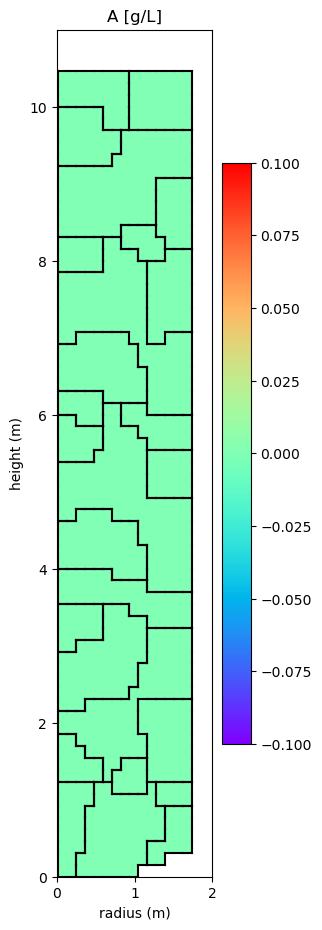

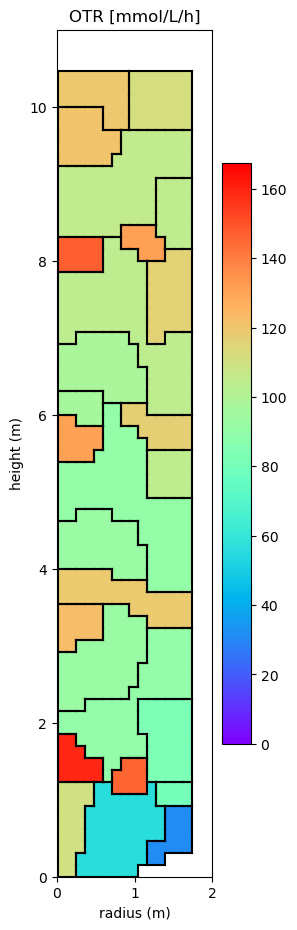

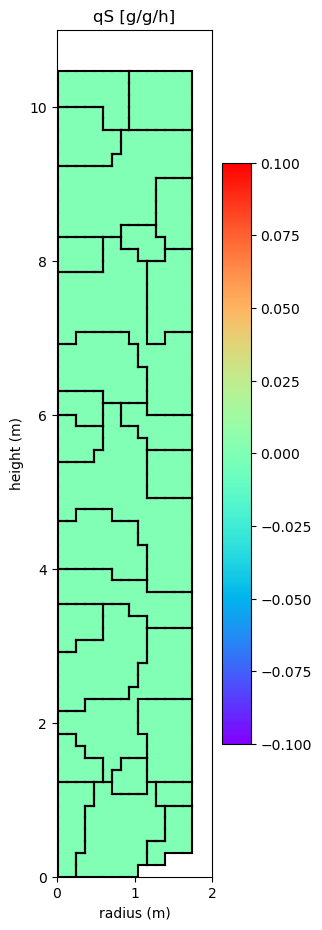

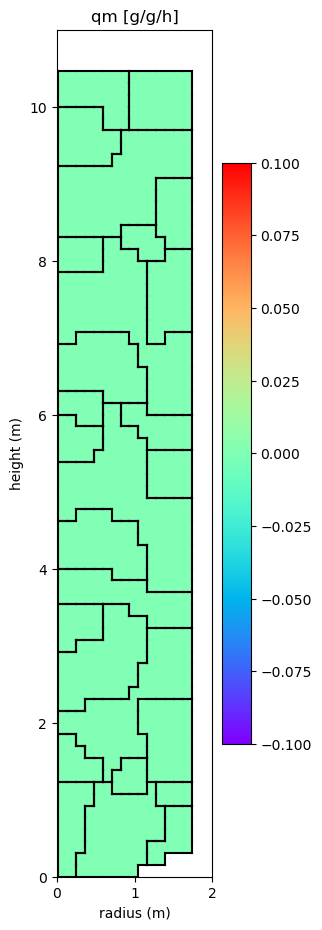

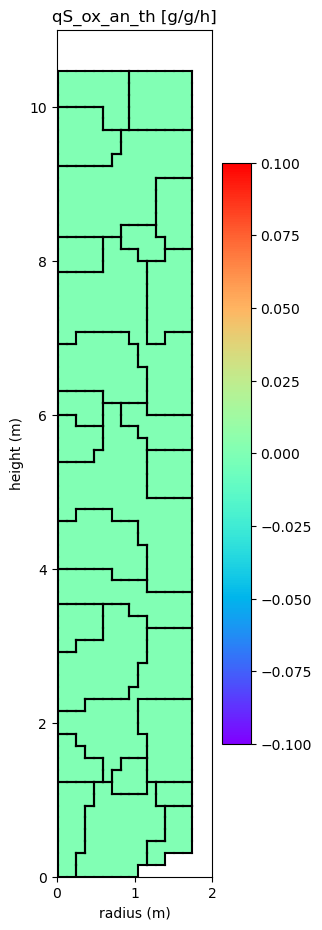

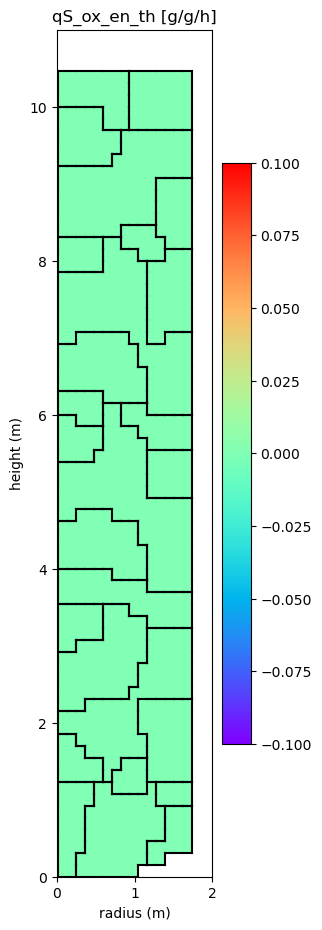

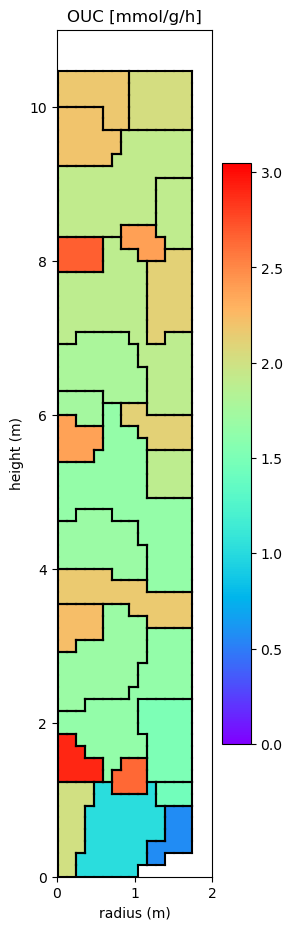

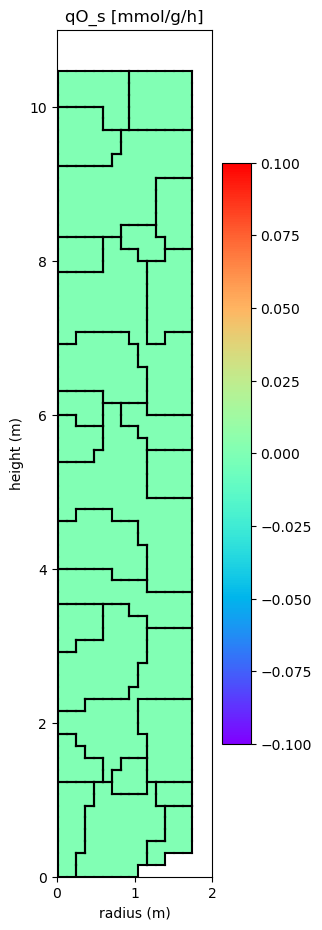

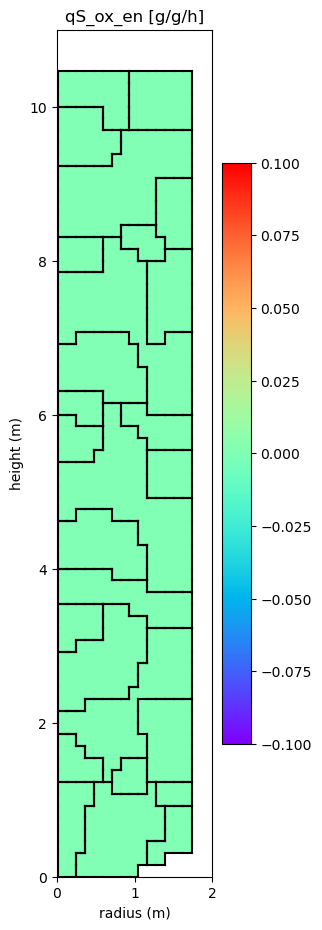

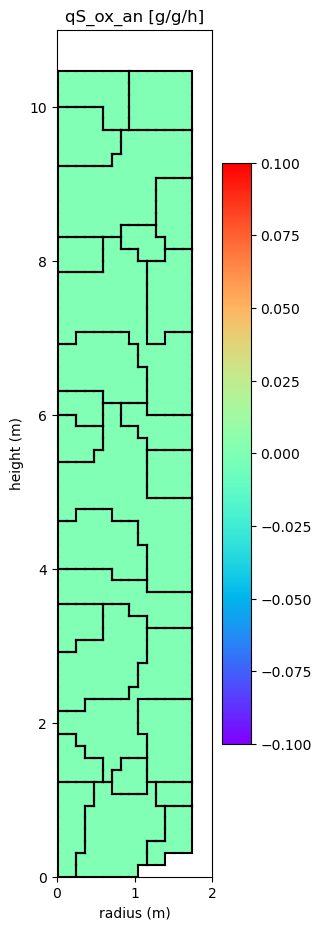

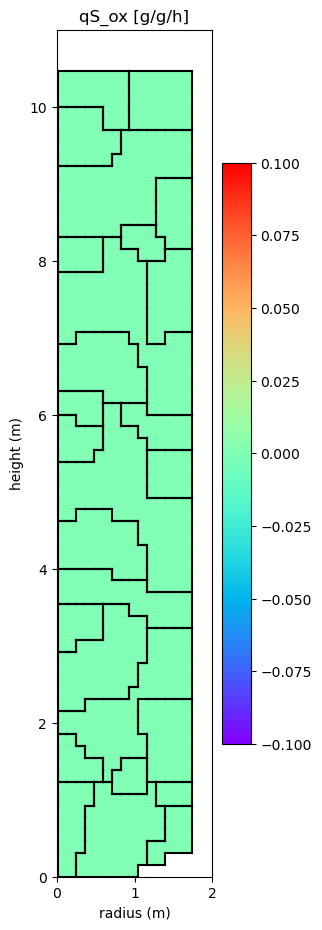

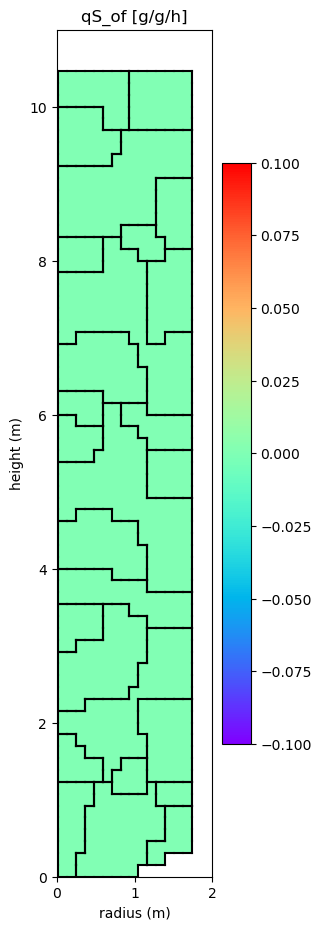

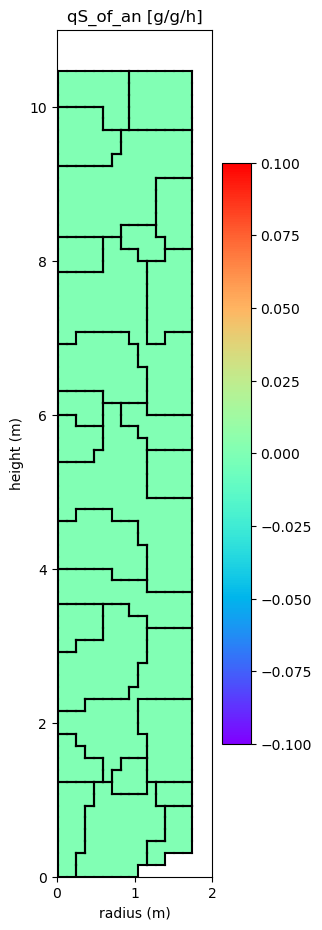

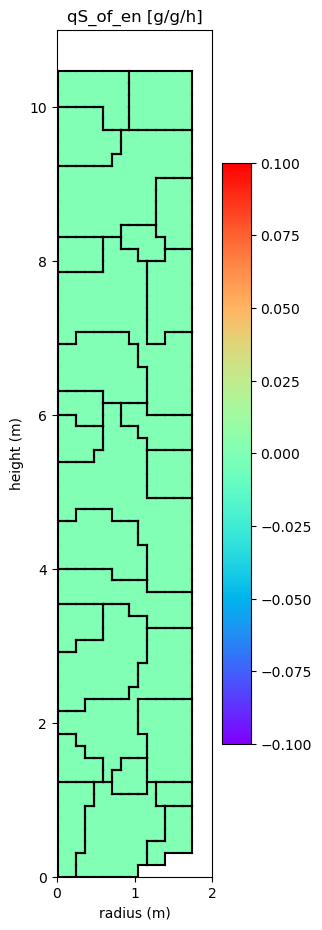

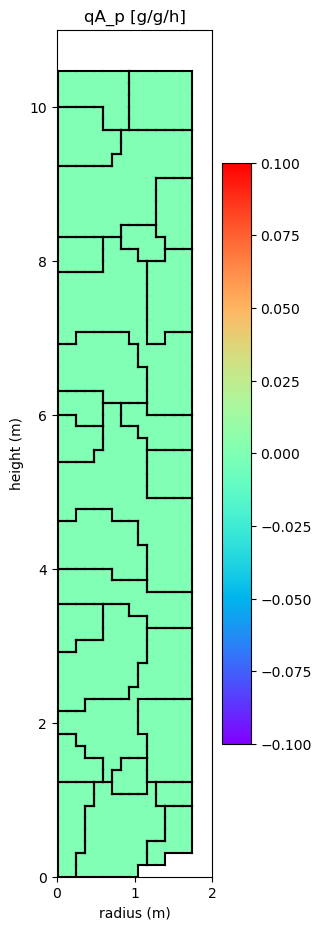

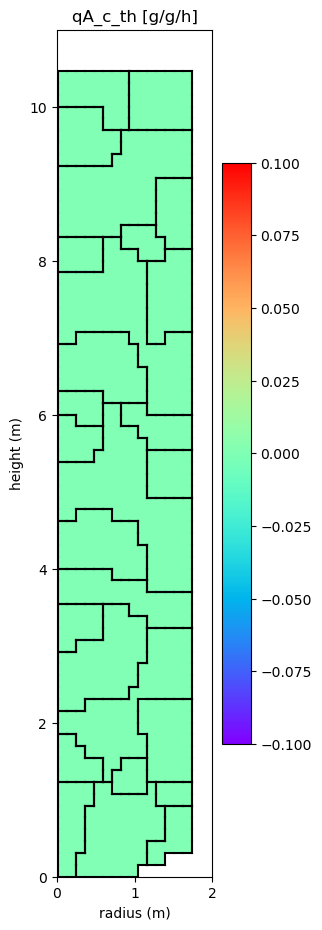

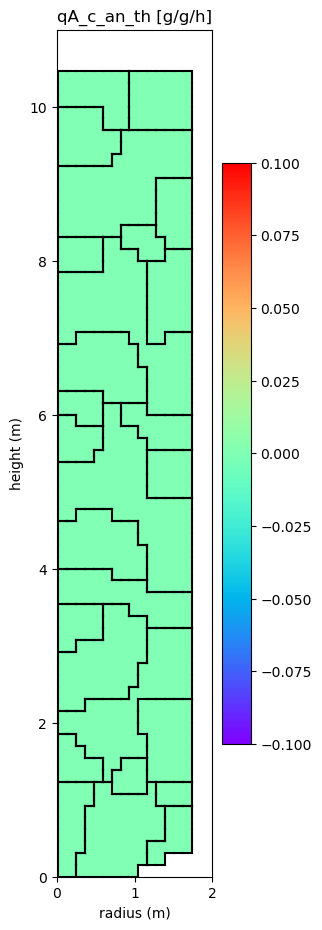

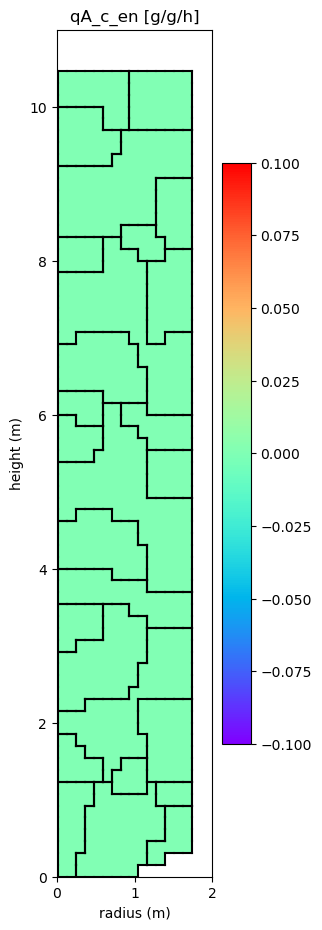

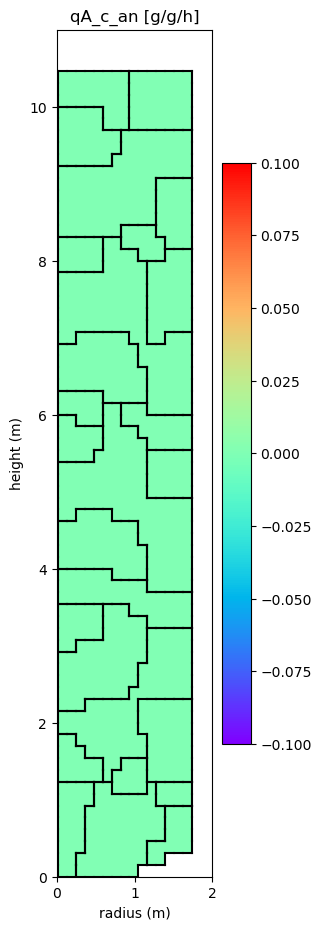

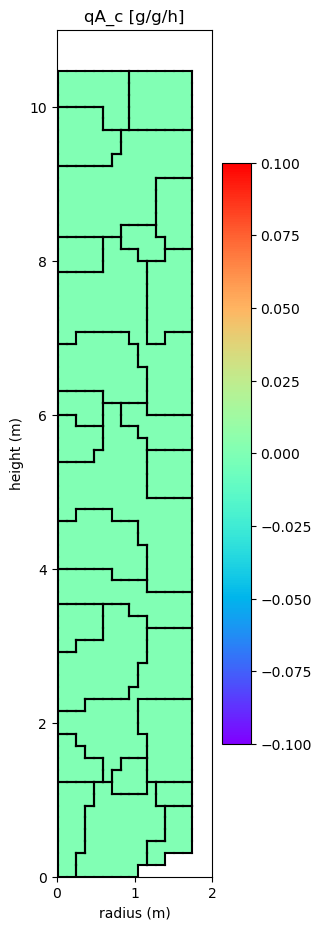

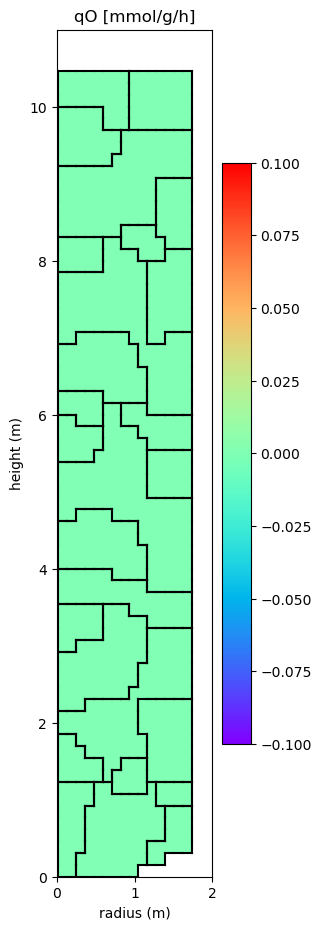

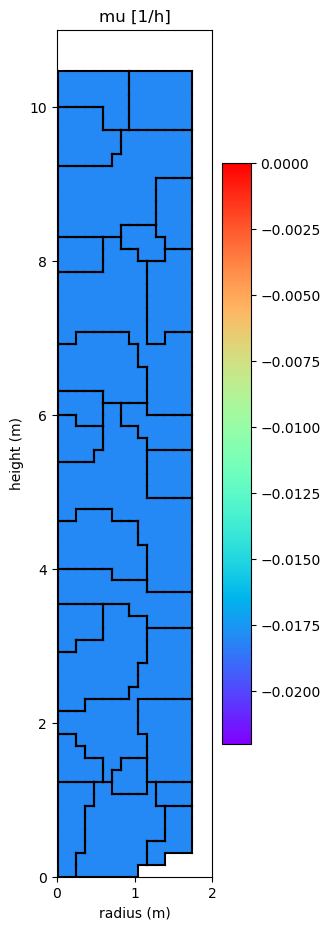

In [30]:
sol.plot_solution()

In [16]:
sol.sol_df

,S [g/L],O [mmol/L],A [g/L],OTR [mmol/L/h],qS [g/g/h],qm [g/g/h],qS_ox_an_th [g/g/h],qS_ox_en_th [g/g/h],OUC [mmol/g/h],qO_s [mmol/g/h],...,qA_c_th [g/g/h],qA_c_an_th [g/g/h],qA_c_en [g/g/h],qA_c_an [g/g/h],qA_c [g/g/h],qO [mmol/g/h],mu [1/h],comp_id,liquid_vol [L],rel_vol
0,0.000142,0.007146,7.086221,55.062195,0.001938,0.001938,0.000000,0.001938,6.382287,0.064528,...,0.035098,0.0,0.035098,0.0,0.035098,1.233303,-0.017710,1,4970.787558,0.060876
1,0.000079,0.004031,7.084913,30.718484,0.001083,0.001083,0.000000,0.001083,0.631439,0.036072,...,0.035098,0.0,0.017879,0.0,0.017879,0.631439,-0.018108,2,2549.557859,0.031224
2,0.000391,0.025982,7.090977,84.534607,0.005297,0.005297,0.000000,0.005297,6.382004,0.176377,...,0.035099,0.0,0.035099,0.0,0.035099,1.345158,-0.016147,3,7269.717186,0.089030
3,0.000283,0.030734,7.089930,86.158584,0.003850,0.003850,0.000000,0.003850,6.382066,0.128211,...,0.035098,0.0,0.035098,0.0,0.035098,1.296990,-0.016821,4,3537.332764,0.043321
4,0.000198,0.025139,7.087893,78.317030,0.002700,0.002700,0.000000,0.002700,6.382187,0.089906,...,0.035098,0.0,0.035098,0.0,0.035098,1.258683,-0.017356,5,5351.017948,0.065532
5,0.002018,0.003953,7.106733,91.743965,0.026491,0.026491,0.000000,0.026491,1.543542,0.882137,...,0.035099,0.0,0.019862,0.0,0.019862,1.543542,-0.006286,6,2555.981837,0.031302
6,0.002542,0.004064,7.107267,89.701850,0.033047,0.033047,0.000000,0.033047,1.714828,1.100461,...,0.035099,0.0,0.018449,0.0,0.018449,1.714828,-0.003235,7,9843.393410,0.120549
7,0.002455,0.003886,7.108773,102.683749,0.031966,0.031966,0.000000,0.031966,1.713903,1.064472,...,0.035099,0.0,0.019502,0.0,0.019502,1.713903,-0.003738,8,2694.495584,0.032999
8,0.009634,0.003826,7.122293,96.890178,0.110323,0.040000,0.039904,0.070419,1.615373,1.615373,...,0.035100,0.0,0.000000,0.0,0.000000,1.615373,0.032721,9,2659.013521,0.032564
9,0.011779,0.003836,7.122071,102.505151,0.130197,0.040000,0.051181,0.079016,1.709110,1.709110,...,0.035100,0.0,0.000000,0.0,0.000000,1.709110,0.041969,10,8246.149124,0.100988


## LS (low settings) process parameter definition wild-type (WT) strain

In [3]:
STR_LS_GNR = cc_cmodel(excel_path='cmodels/cmodel_files/RTD_LS/9_RTD_LS.xlsx')

In [4]:
complex_mmodel = cc_xu_bb(
    strain_id='Xu et al. 1999 literature strain',
    strain_description='WT E. coli'
)
complex_mmodel.define_strain_params(
    qS_max=np.mean([0.74036, 0.72265]),#np.mean([0.81528,0.7752]),## #1.3 np.mean([0.74036, 0.72265])
    qm_max=0.04, #0.04
    #qA_c_max=np.mean([0.03444,0.036252]), #0.15
    qA_c_max=np.mean([0.03444,0.03726]),
    qO_max=np.mean([6.7453,6.9238]), #15 np.mean([5.9305,5.8531]) np.mea(n[5.4322, 5.5012])
    Ysx_ox=np.mean([0.4592,0.4714]), # np.mean([0.4592,0.4714])    0.5 np.mean([0.41704,0.43812]) 
    Ysx_of=np.mean([0.4592,0.4714]), # np.mean([0.4592,0.4714])      0.15 np.mean([0.46473,0.50662])-np.mean([0.41704,0.43812]) np.mean([0.41704,0.43812])
    Ysa=0.667, #0.667 np.mean([0.25974,0.23213])
    Yax=0, #0.4
    Ki_s=100, #5
    Ks=0.05, #0.05
    Ka=0.05, #0.05
    Ki_o=100 #4
)

Hello
Hello
Hello
Hello
Hello
Hello


,X (g/L),qS (g/g/h),µ (1/h),qS_ox (g/g/h),qS_of (g/g/h),qO (mmol/L/h),qA_c (g/g/h)
0,35,0.122467,0.038372,0.083958,0.038509,2.135338,0.011111
1,40,0.107159,0.031249,0.067582,0.039577,1.875726,0.011419
2,45,0.095252,0.025709,0.055355,0.039897,1.647386,0.011511
3,50,0.085727,0.021277,0.045938,0.039789,1.467743,0.01148
4,55,0.077934,0.017651,0.038517,0.039416,1.327292,0.011372
5,60,0.071439,0.014629,0.032566,0.038873,1.214258,0.011216


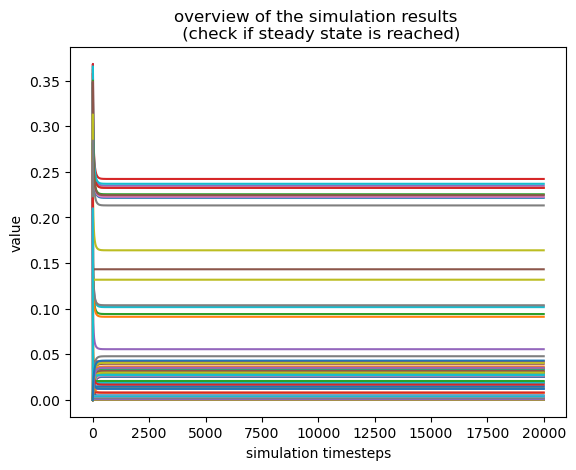

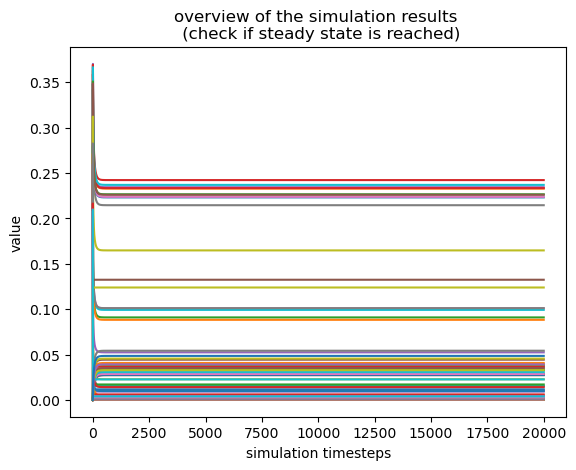

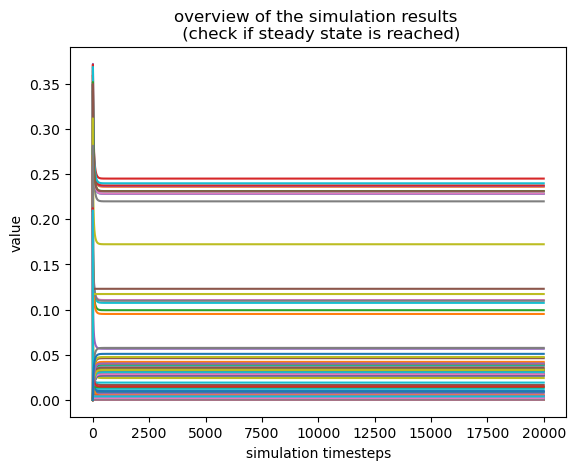

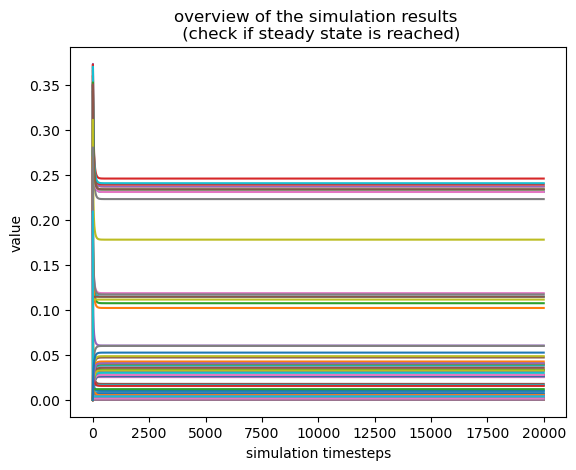

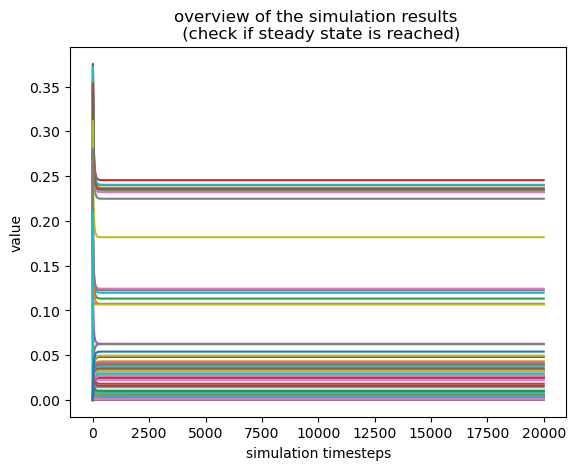

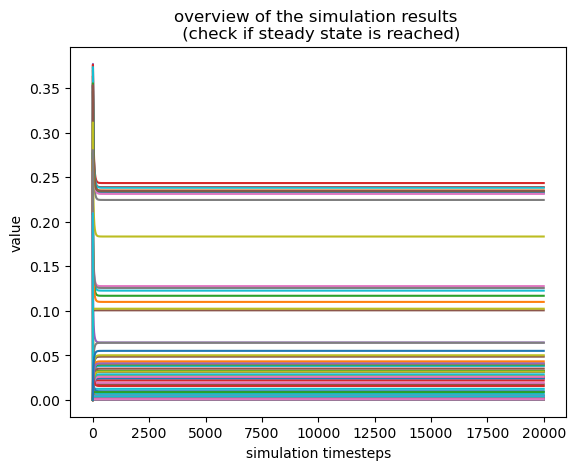

In [5]:
### Constant feed but different biomass concentration
#df = sol.sol_df
y0_1d = [
    0.0, #S 
    0.2095, #O
    0 #A
    ]

# multiply initial values with the number of compartments
y0 = y0_1d*len(STR_LS_GNR.CompVolumes)
# simulation time
t_eval=np.linspace(0,40,20001)
# to keep things consistent: A biomass concentration of 40 g/L was chosen for Ys = 0.5; hence Ysx = 0.52 should result in 41.6. This is to keep the glucose feed rate constant accross different examples. 
# Growth rate for the fed-batch
mu_set = 0.05
# Liquid volume in the whole reactor
VL = (STR_LS_GNR.CompVolumes.CompVol - STR_LS_GNR.CompVolumes.CompVol*STR_LS_GNR.GH.GH).sum()
# Biomass yield
Ysx = complex_mmodel.Ysx_ox
# compartment model instance
cmodel = STR_LS_GNR
X_vector=list(range(35, 61, 5))
species_sumry=pd.DataFrame(columns=['X (g/L)','qS (g/g/h)','µ (1/h)','qS_ox (g/g/h)','qS_of (g/g/h)','qO (mmol/L/h)','qA_c (g/g/h)'])
for i in range(len(X_vector)):
    # Biomass concentration 
    X = X_vector[i] 
    # Glucose feed rate
    #Fs_feed = mu_set/Ysx*X*VL*1000
    Fs_feed=350000 #gS/h 400000 gS/h looks good!

    sol = cc_cmodel_sol(
        y0 = y0,
        t_eval = t_eval, 
        mmodel = complex_mmodel, 
        cmodel = cmodel, 
        X = X, 
        Fs_feed = Fs_feed
    )
    df = sol.sol_df
    df['rel_vol'] = df['liquid_vol [L]']/df['liquid_vol [L]'].sum()
    species_sumry.loc[i,'X (g/L)']=X_vector[i]
    species_sumry.loc[i,'qS (g/g/h)']=(df['qS [g/g/h]']*df['rel_vol']).sum()
    species_sumry.loc[i,'µ (1/h)']=(df['mu [1/h]']*df['rel_vol']).sum()
    species_sumry.loc[i,'qS_ox (g/g/h)']=(df['qS_ox [g/g/h]']*df['rel_vol']).sum()
    species_sumry.loc[i,'qS_of (g/g/h)']=(df['qS_of [g/g/h]']*df['rel_vol']).sum()
    species_sumry.loc[i,'qO (mmol/L/h)']=(df['qO [mmol/g/h]']*df['rel_vol']).sum()
    species_sumry.loc[i,'qA_c (g/g/h)']=(df['qA_c [g/g/h]']*df['rel_vol']).sum()
    
species_sumry

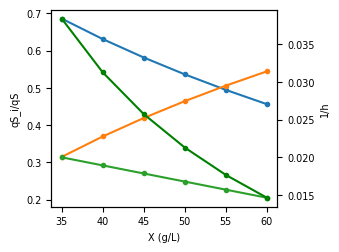

0    0.038372
1    0.031249
2    0.025709
3    0.021277
4    0.017651
5    0.014629
Name: µ (1/h), dtype: object

In [11]:
# Create the figure and two axes objects
#%%
def cm2inch(*tupl):
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)
#fig,ax1=plt.subplots()
fig, ax1 = plt.subplots(figsize=cm2inch(7.4, 6.5))
plt.rcParams['font.size']=7 
# Make a second axes that shares the same x-axis
ax2 = ax1.twinx()
# Plot the first data series on the first axis
ax1.plot(species_sumry['X (g/L)'],species_sumry['qS_ox (g/g/h)']/species_sumry['qS (g/g/h)'],'o-',label='qS_ox',markersize=3)
ax1.plot(species_sumry['X (g/L)'],species_sumry['qS_of (g/g/h)']/species_sumry['qS (g/g/h)'],'o-',label='qS_of',markersize=3)
ax1.plot(species_sumry['X (g/L)'],species_sumry['µ (1/h)']/species_sumry['qS (g/g/h)'],'o-',label='YSX',markersize=3)
ax1.set_xlabel('X (g/L)')
ax1.set_ylabel('qS_i/qS')
# Plot the second data series on the second axis
ax2.plot(species_sumry['X (g/L)'],species_sumry['µ (1/h)'],'go-',label='µ',markersize=3)
ax2.set_ylabel('1/h')

# Add a legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
#ax1.legend(lines, labels, loc='center left')

# Show the plot


plt.savefig('C:/Users/s210212/Documents/DTU/Thesis/Report/Figures/Process_scale_parameters/Process_scale_param_def_WT.jpeg',dpi=600,bbox_inches='tight')
plt.show()

species_sumry['µ (1/h)']

#plt.plot(species_sumry['X (g/L)'],species_sumry['qS (g/g/h)'],'o-')

# LS process parameter definition HMP

In [12]:
STR_LS_GNR = cc_cmodel(excel_path='cmodels/cmodel_files/RTD_LS/9_RTD_LS.xlsx')

In [13]:
complex_mmodel = cc_xu_bb(
    strain_id='Xu et al. 1999 literature strain',
    strain_description='HMP E. coli'
)
complex_mmodel.define_strain_params(
    qS_max=np.mean([1.0346, 1.0549]), #np.mean([1.0536,1.0631])  1.3 ###real np.mean([1.0346, 1.0549])
    qm_max=0.04, #0.04
    #qA_c_max=np.mean([0.05848,0.061354]), #0.15 np.mean([0.05848,0.061354])
    qA_c_max=np.mean([0.05636,0.06379]),
    qO_max=np.mean([9.0033,8.8746]), #15np.mean([7.4722,7.292]) #### real np.mean([9.0033,8.8746])
    Ysx_ox=np.mean([0.35331,0.34492]), #0.5np.mean([0.34694,0.34227])     ### real np.mean([0.35331,0.34492])
    Ysx_of=np.mean([0.2745, 0.27167]), #0.15np.mean([0.27253,0.27026])   ### real np.mean([0.2745, 0.27167])
    Ysa=0.667, #np.mean([0.15666,0.16875]), #0.667
    Yax=0, #0.4
    Ki_s=100, #5
    Ks=0.05, #0.05
    Ka=0.05, #0.05
    Ki_o=100 #4
)

Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello


,X (g/L),qS (g/g/h),µ (1/h),qS_ox (g/g/h),qS_of (g/g/h),qO (mmol/L/h),qA_c (g/g/h),Fs_feed (g/h)
0,NaN,0.090049,0.014745,0.054175,0.035874,1.874588,0.015959,250000.0
1,NaN,0.093651,0.015778,0.054814,0.038838,1.935946,0.017278,260000.0
2,NaN,0.097253,0.016813,0.05549,0.041764,1.997648,0.018579,270000.0
3,NaN,0.100855,0.017851,0.056202,0.044653,2.059695,0.019865,280000.0
4,NaN,0.104457,0.018891,0.056951,0.047506,2.122088,0.021134,290000.0
5,NaN,0.108059,0.019947,0.057907,0.050152,2.185562,0.022311,300000.0
6,NaN,0.111661,0.021065,0.059675,0.051987,2.252732,0.023127,310000.0
7,NaN,0.115263,0.022136,0.06082,0.054443,2.317423,0.02422,320000.0
8,NaN,0.118865,0.023199,0.061861,0.057004,2.381874,0.025359,330000.0
9,NaN,0.122467,0.024262,0.062899,0.059568,2.446029,0.0265,340000.0


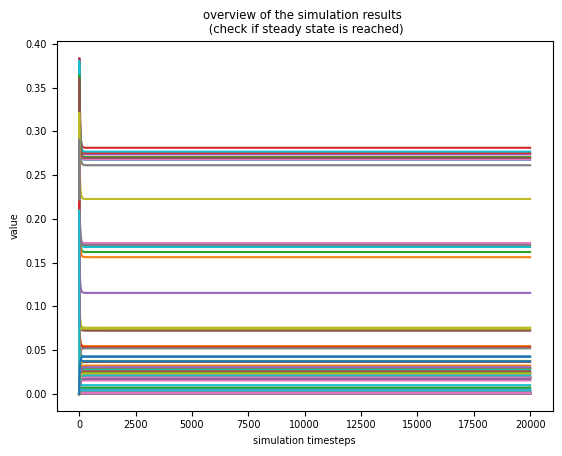

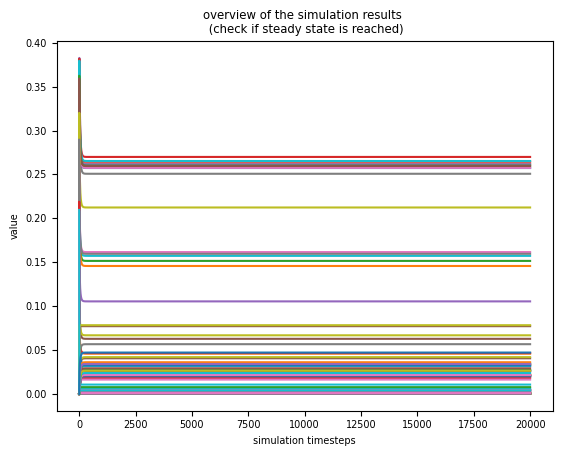

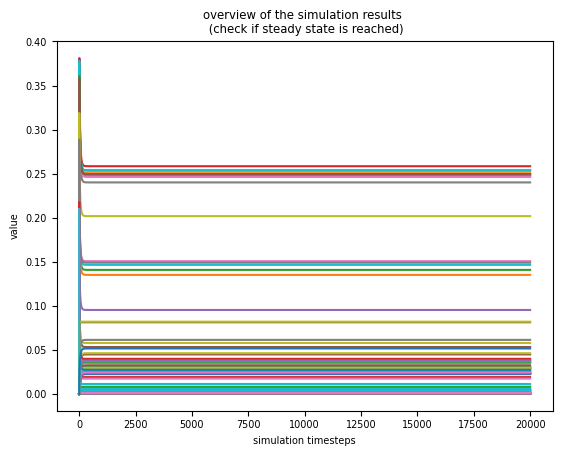

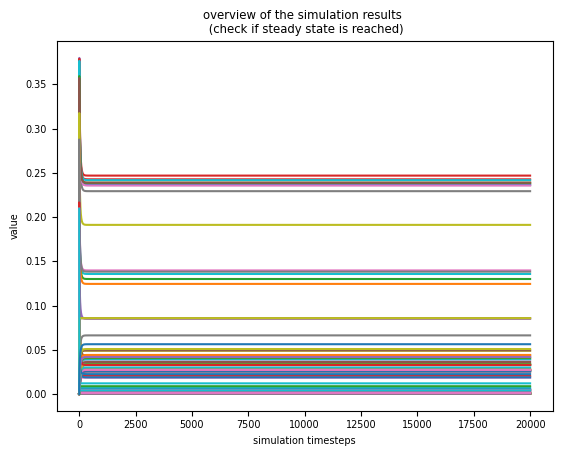

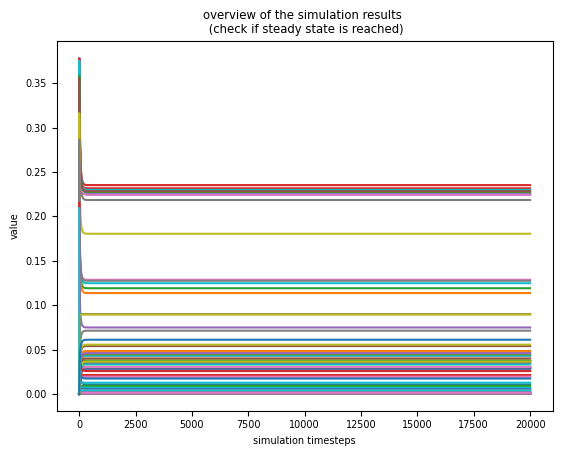

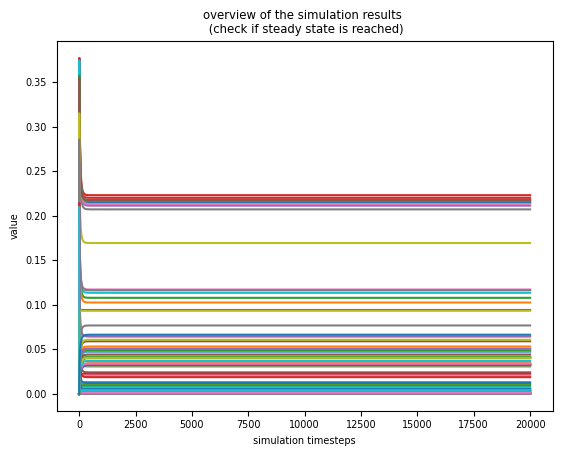

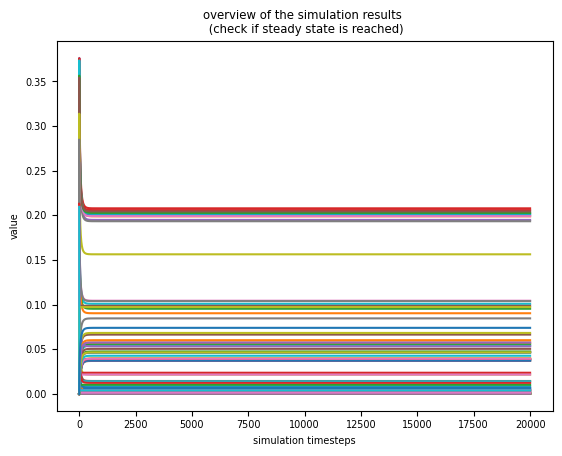

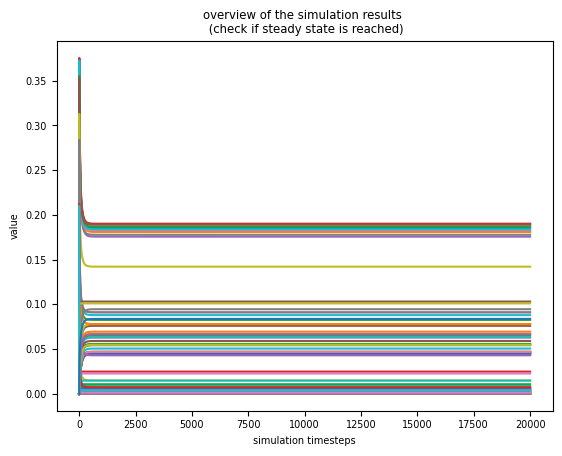

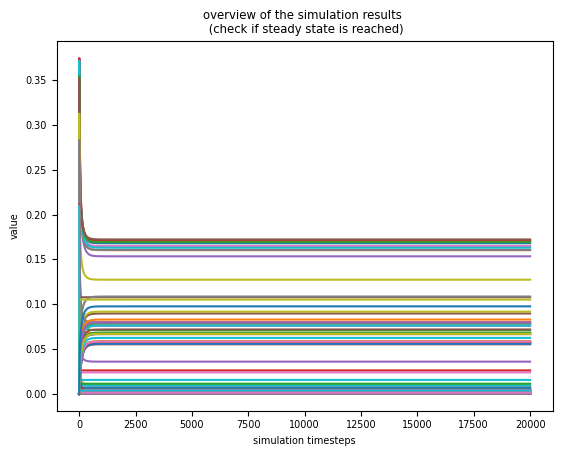

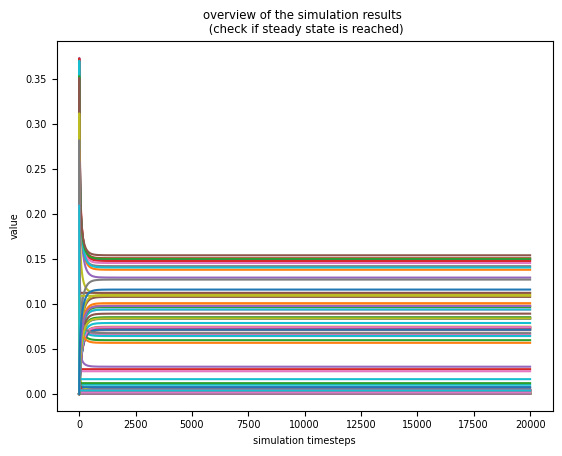

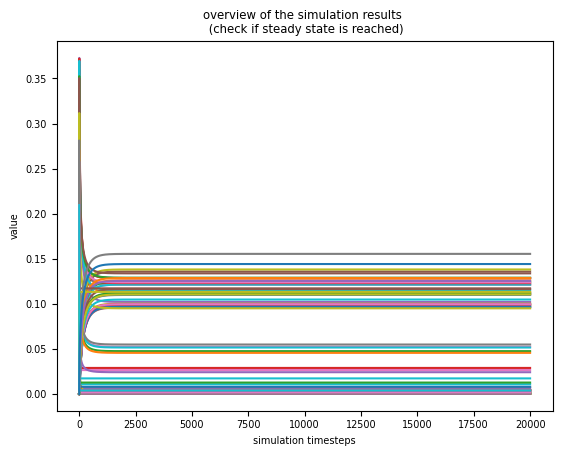

In [14]:
### The one for choosing
#df = sol.sol_df
y0_1d = [
    0.0, #S 
    0.2095, #O
    0 #A
    ]

# multiply initial values with the number of compartments
y0 = y0_1d*len(STR_LS_GNR.CompVolumes)
# simulation time
t_eval=np.linspace(0,40,20001)
# to keep things consistent: A biomass concentration of 40 g/L was chosen for Ys = 0.5; hence Ysx = 0.52 should result in 41.6. This is to keep the glucose feed rate constant accross different examples. 
# Growth rate for the fed-batch
mu_set = 0.05
# Liquid volume in the whole reactor
VL = (STR_LS_GNR.CompVolumes.CompVol - STR_LS_GNR.CompVolumes.CompVol*STR_LS_GNR.GH.GH).sum()
# Biomass yield
Ysx = complex_mmodel.Ysx_ox
# compartment model instance
cmodel = STR_LS_GNR
#X_vector=list(range(32, 35, 2))
Fs_feed_vector=list(range(250000,350001,10000))
species_sumry=pd.DataFrame(columns=['X (g/L)','qS (g/g/h)','µ (1/h)','qS_ox (g/g/h)','qS_of (g/g/h)','qO (mmol/L/h)','qA_c (g/g/h)'])
for i in range(len(Fs_feed_vector)):
    # Biomass concentration 
    X = 34
    # Glucose feed rate
    #Fs_feed = mu_set/Ysx*X*VL*1000
    Fs_feed=Fs_feed_vector[i]
    sol = cc_cmodel_sol(
        y0 = y0,
        t_eval = t_eval, 
        mmodel = complex_mmodel, 
        cmodel = cmodel, 
        X = X, 
        Fs_feed = Fs_feed
    )
    df = sol.sol_df
    df['rel_vol'] = df['liquid_vol [L]']/df['liquid_vol [L]'].sum()
    species_sumry.loc[i,'Fs_feed (g/h)']=Fs_feed
    species_sumry.loc[i,'qS (g/g/h)']=(df['qS [g/g/h]']*df['rel_vol']).sum()
    species_sumry.loc[i,'µ (1/h)']=(df['mu [1/h]']*df['rel_vol']).sum()
    species_sumry.loc[i,'qS_ox (g/g/h)']=(df['qS_ox [g/g/h]']*df['rel_vol']).sum()
    species_sumry.loc[i,'qS_of (g/g/h)']=(df['qS_of [g/g/h]']*df['rel_vol']).sum()
    species_sumry.loc[i,'qO (mmol/L/h)']=(df['qO [mmol/g/h]']*df['rel_vol']).sum()
    species_sumry.loc[i,'qA_c (g/g/h)']=(df['qA_c [g/g/h]']*df['rel_vol']).sum()
    
species_sumry

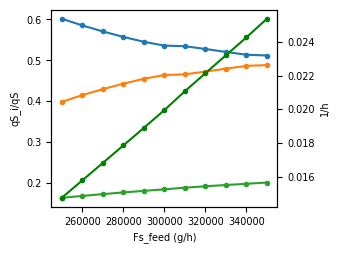

0     0.014745
1     0.015778
2     0.016813
3     0.017851
4     0.018891
5     0.019947
6     0.021065
7     0.022136
8     0.023199
9     0.024262
10    0.025368
Name: µ (1/h), dtype: object

In [15]:
# Create the figure and two axes objects
#%%
def cm2inch(*tupl):
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)
#fig,ax1=plt.subplots()
fig, ax1 = plt.subplots(figsize=cm2inch(7.4, 6.5))
plt.rcParams['font.size']=7 
# Make a second axes that shares the same x-axis
ax2 = ax1.twinx()
# Plot the first data series on the first axis
ax1.plot(species_sumry['Fs_feed (g/h)'],species_sumry['qS_ox (g/g/h)']/species_sumry['qS (g/g/h)'],'o-',label='qS_ox',markersize=3)
ax1.plot(species_sumry['Fs_feed (g/h)'],species_sumry['qS_of (g/g/h)']/species_sumry['qS (g/g/h)'],'o-',label='qS_of',markersize=3)
ax1.plot(species_sumry['Fs_feed (g/h)'],species_sumry['µ (1/h)']/species_sumry['qS (g/g/h)'],'o-',label='YSX',markersize=3)
ax1.set_xlabel('Fs_feed (g/h)')
ax1.set_ylabel('qS_i/qS')
# Plot the second data series on the second axis
ax2.plot(species_sumry['Fs_feed (g/h)'],species_sumry['µ (1/h)'],'go-',label='µ',markersize=3)
ax2.set_ylabel('1/h')

# Add a legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
#ax1.legend(lines, labels, loc='center right')

# Show the plot
plt.savefig('C:/Users/s210212/Documents/DTU/Thesis/Report/Figures/Process_scale_parameters/Process_scale_param_def_HMP.jpeg',dpi=600,bbox_inches='tight')
plt.show()

species_sumry['µ (1/h)']

#plt.plot(species_sumry['X (g/L)'],species_sumry['qS (g/g/h)'],'o-')

In [9]:
species_sumry.loc[2,'qS_of (g/g/h)']/species_sumry.loc[2,'qS (g/g/h)']

0.4294024348036148

## The chosen process condition WT

In [16]:
STR_LS_GNR = cc_cmodel(excel_path='cmodels/cmodel_files/RTD_LS/9_RTD_LS.xlsx')

In [17]:
complex_mmodel = cc_xu_bb(
    strain_id='Xu et al. 1999 literature strain',
    strain_description='WT E. coli'
)
complex_mmodel.define_strain_params(
    #qS_max=np.mean([0.74036, 0.72265]),#np.mean([0.81528,0.7752]),## #1.3 np.mean([0.74036, 0.72265])
    #qm_max=0.04, #0.04
    #qA_c_max=np.mean([0.03444,0.036252]), #0.15
    #qO_max=np.mean([6.7453,6.9238]), #15 np.mean([5.9305,5.8531]) np.mea(n[5.4322, 5.5012])
    #Ysx_ox=np.mean([0.4592,0.4714]), # np.mean([0.4592,0.4714])    0.5 np.mean([0.41704,0.43812]) 
    #Ysx_of=np.mean([0.4592,0.4714]), # np.mean([0.4592,0.4714])      0.15 np.mean([0.46473,0.50662])-np.mean([0.41704,0.43812]) np.mean([0.41704,0.43812])
    #Ysa=0.667, #0.667 np.mean([0.25974,0.23213])
    #Yax=0, #0.4
    #Ki_s=100, #5
    #Ks=0.05, #0.05
    #Ka=0.05, #0.05
    #Ki_o=100 #4
#)
    qS_max=np.mean([0.78433, 0.76553]),#np.mean([0.81528,0.7752]),## #1.3 np.mean([0.74036, 0.72265])
    qm_max=0, #0.04
    #qA_c_max=np.mean([0.03444,0.036252]), #0.15
    qA_c_max=np.mean([0.03444,0.03726]),
    qO_max=np.mean([6.7453,6.9238]), #15 np.mean([5.9305,5.8531]) np.mea(n[5.4322, 5.5012])
    Ysx_ox=np.mean([0.43349, 0.44498]), # np.mean([0.4592,0.4714])    np.mean([0.43349, 44498])
    Ysx_of=np.mean([0.43349, 0.44498]), # np.mean([0.4592,0.4714])      0.15 np.mean([0.46473,0.50662])-np.mean([0.41704,0.43812]) np.mean([0.41704,0.43812])
    Ysa=0.667, #0.667 np.mean([0.25974,0.23213])
    Yax=0, #0.4
    Ki_s=100, #5
    Ks=0.05, #0.05
    Ka=0.05, #0.05
    Ki_o=100 #4
)

Hello


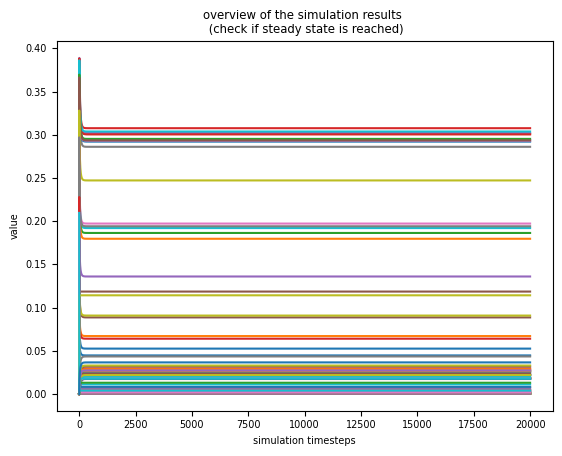

In [18]:
### The one for choosing
#df = sol.sol_df
y0_1d = [
    0.0, #S 
    0.2095, #O
    0 #A
    ]

# multiply initial values with the number of compartments
y0 = y0_1d*len(STR_LS_GNR.CompVolumes)
# simulation time
t_eval=np.linspace(0,40,20001)
# to keep things consistent: A biomass concentration of 40 g/L was chosen for Ys = 0.5; hence Ysx = 0.52 should result in 41.6. This is to keep the glucose feed rate constant accross different examples. 
# Growth rate for the fed-batch
#mu_set = 0.05
# Liquid volume in the whole reactor
VL = (STR_LS_GNR.CompVolumes.CompVol - STR_LS_GNR.CompVolumes.CompVol*STR_LS_GNR.GH.GH).sum()
# Biomass yield
Ysx = complex_mmodel.Ysx_ox
# compartment model instance
cmodel = STR_LS_GNR
#X_vector=list(range(35, 61, 5))
X = 45
    # Glucose feed rate
Fs_feed = 350000

sol = cc_cmodel_sol(
    y0 = y0,
    t_eval = t_eval, 
    mmodel = complex_mmodel, 
    cmodel = cmodel, 
    X = X, 
    Fs_feed = Fs_feed
)

In [19]:
df = sol.sol_df
Sf_pulse=500 #g/L
##Starvation
amnt_comp=27
count=0
#species_sumry.loc[2,'qS_of (g/g/h)']/species_sumry.loc[2,'qS (g/g/h)']
for i in range(len(df)):
    if df.loc[i,'qS [g/g/h]']/complex_mmodel.qS_max<0.05:
        count=count+1
    
perc_subs_starv=count/27

##Of
df['rel_vol'] = df['liquid_vol [L]']/df['liquid_vol [L]'].sum()
species_sumry=pd.DataFrame(columns=['X (g/L)','qS (g/g/h)','µ (1/h)','qS_ox (g/g/h)','qS_of (g/g/h)','qO (mmol/L/h)','qA_c (g/g/h)'])
species_sumry.loc[1,'X (g/L)']=45
species_sumry.loc[1,'qS (g/g/h)']=(df['qS [g/g/h]']*df['rel_vol']).sum()
species_sumry.loc[1,'µ (1/h)']=(df['mu [1/h]']*df['rel_vol']).sum()
species_sumry.loc[1,'qS_ox (g/g/h)']=(df['qS_ox [g/g/h]']*df['rel_vol']).sum()
species_sumry.loc[1,'qS_of (g/g/h)']=(df['qS_of [g/g/h]']*df['rel_vol']).sum()
species_sumry.loc[1,'qO (mmol/L/h)']=(df['qO [mmol/g/h]']*df['rel_vol']).sum()
species_sumry.loc[1,'qA_c (g/g/h)']=(df['qA_c [g/g/h]']*df['rel_vol']).sum()
species_sumry
perc_of=species_sumry.loc[1,'qS_of (g/g/h)']/species_sumry.loc[1,'qS (g/g/h)']

D_set=species_sumry.loc[1,'qS (g/g/h)']*X/Sf_pulse
print(D_set)
print(perc_subs_starv)
print(perc_of)


0.008572700909332775
0.5925925925925926
0.3085221236366777


C:\Users\s210212\Documents\DTU\Thesis\Python_code\Xu_IF_allvol\cmodels\cc_cmodel_sol.py:59: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = mpl.pyplot.subplots(figsize=(2.5, 11))


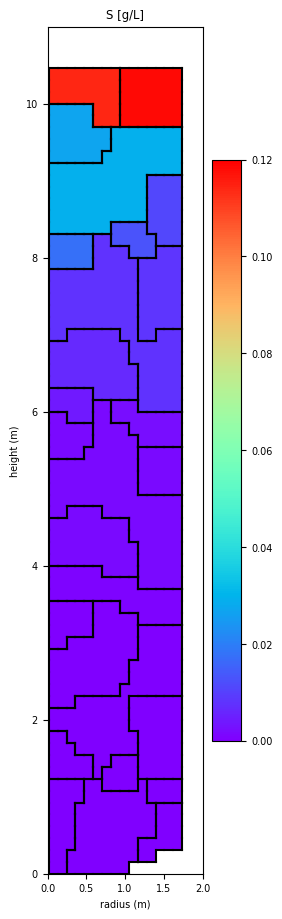

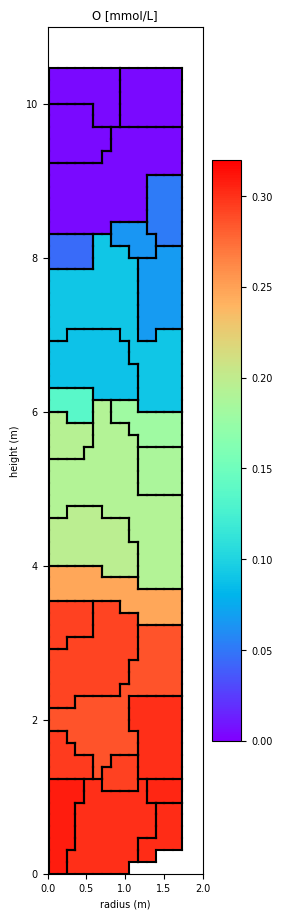

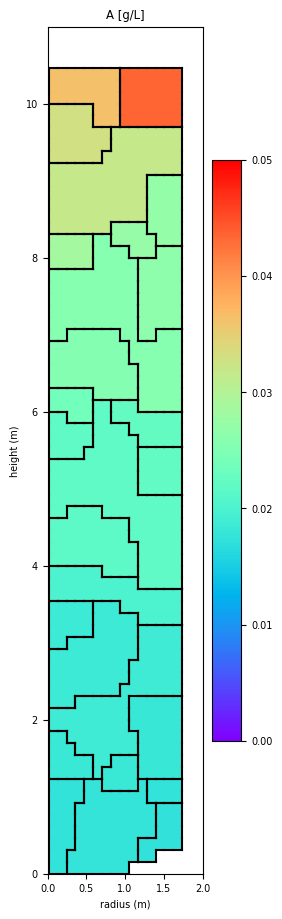

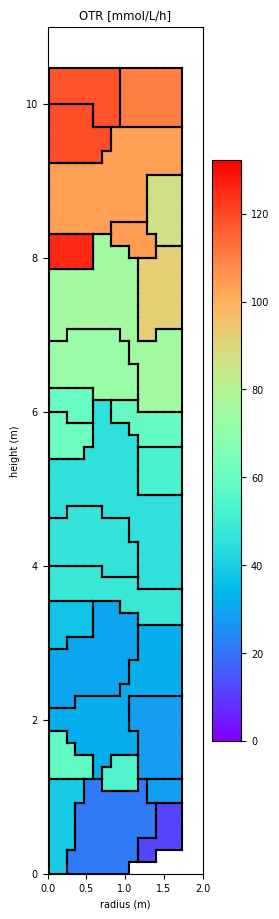

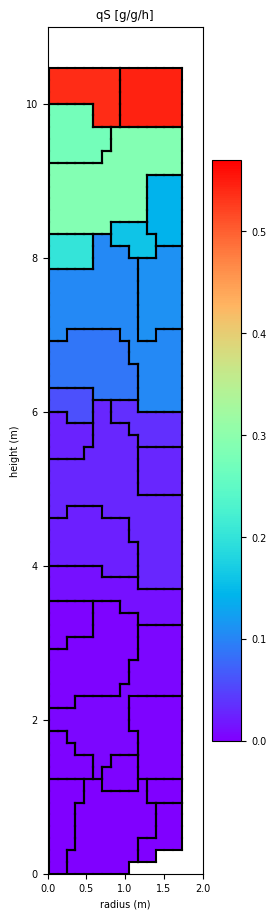

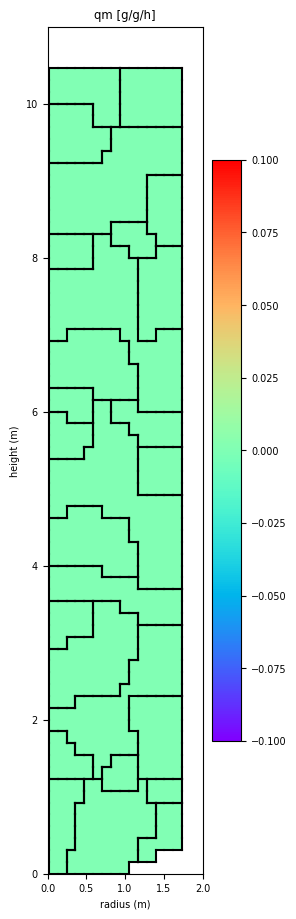

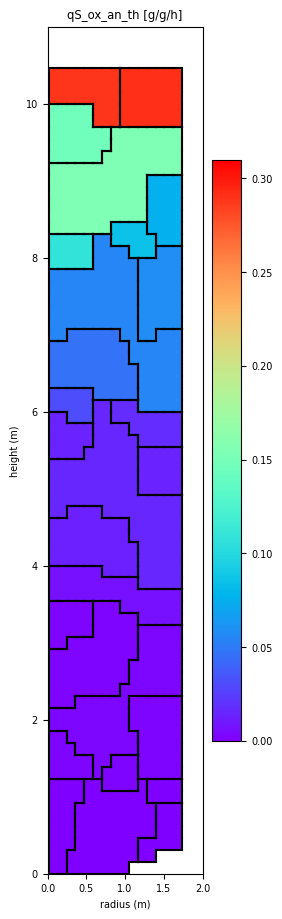

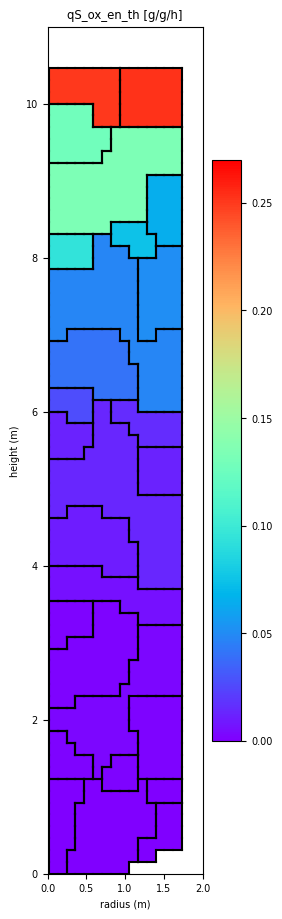

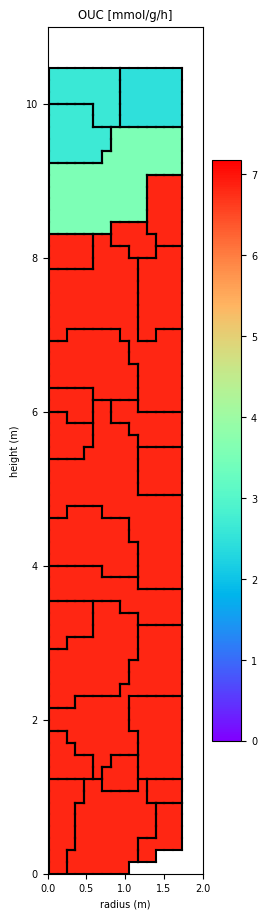

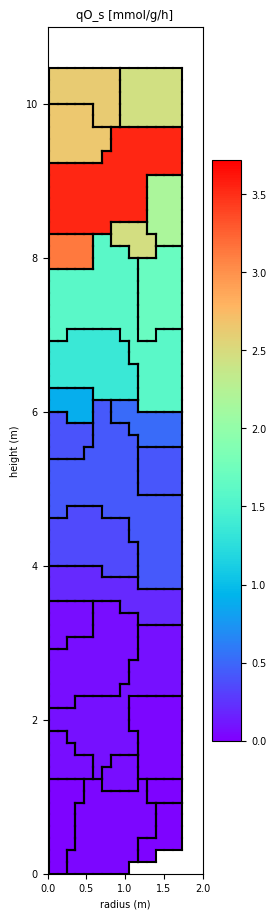

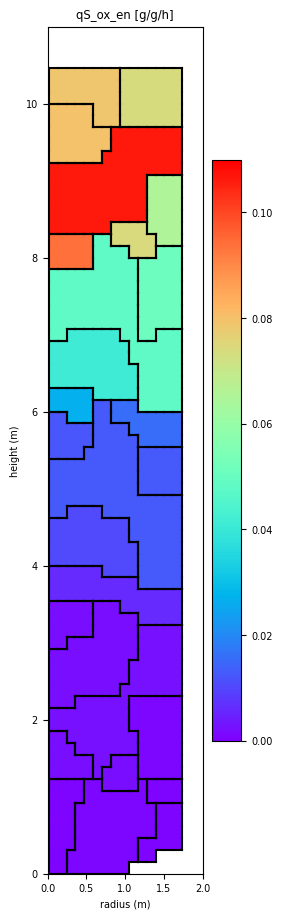

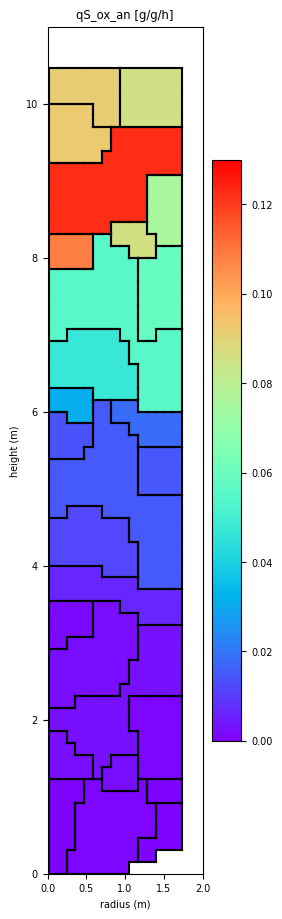

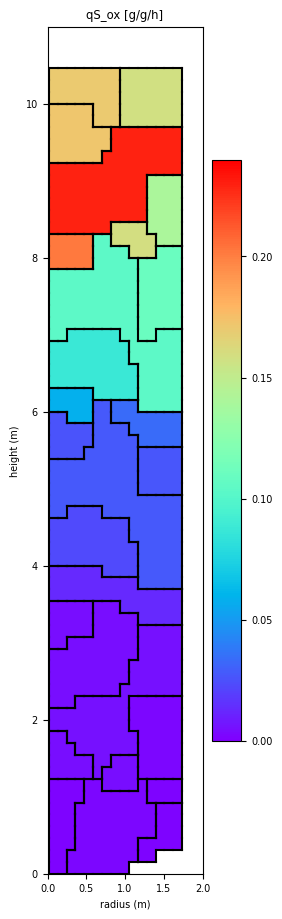

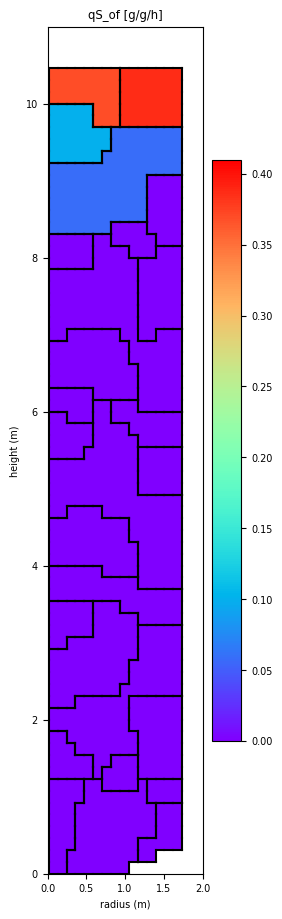

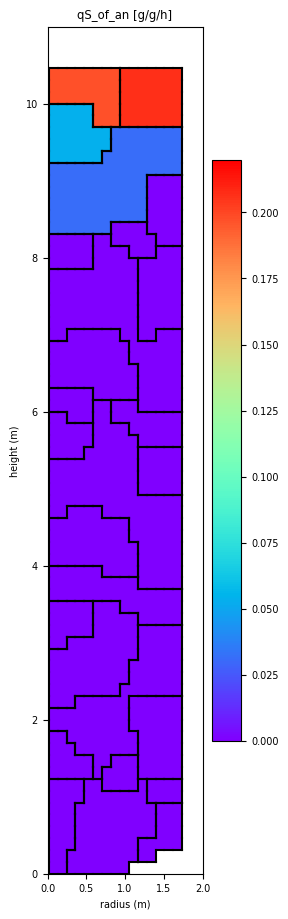

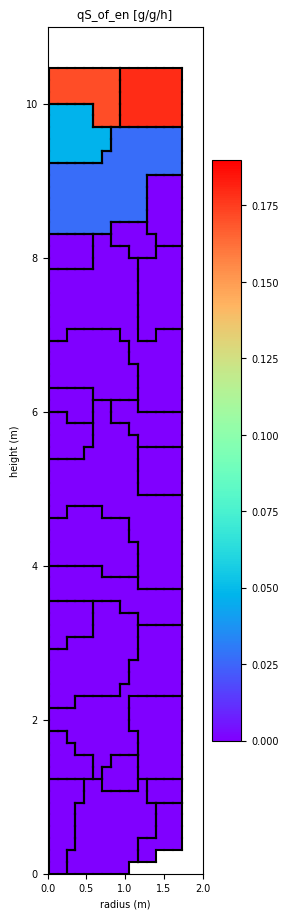

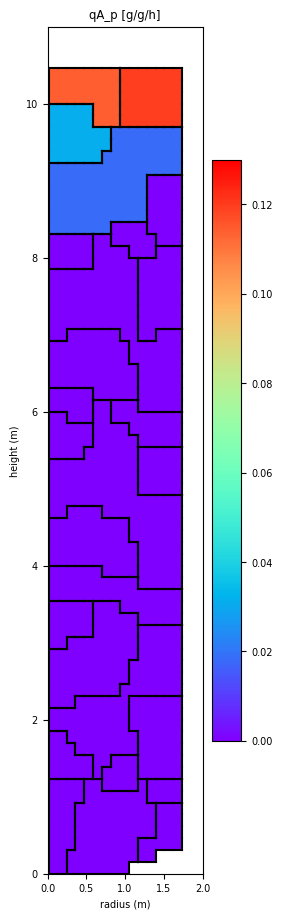

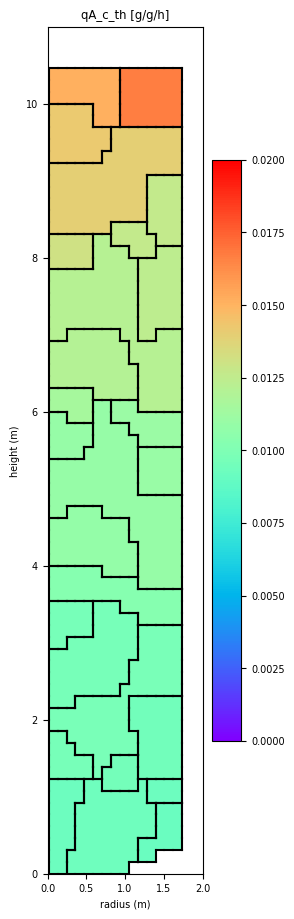

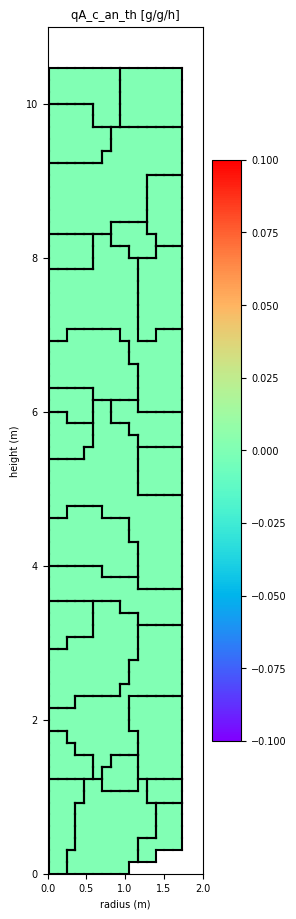

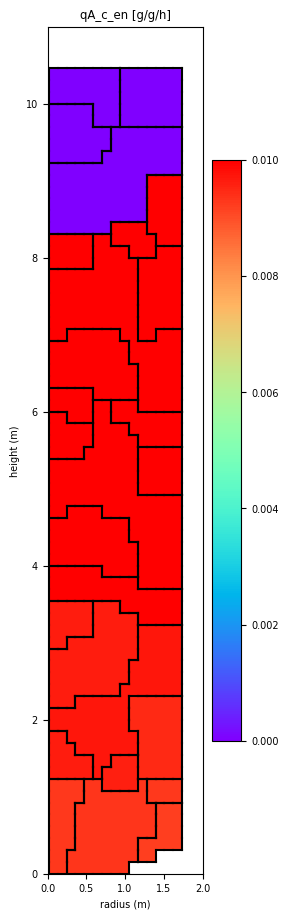

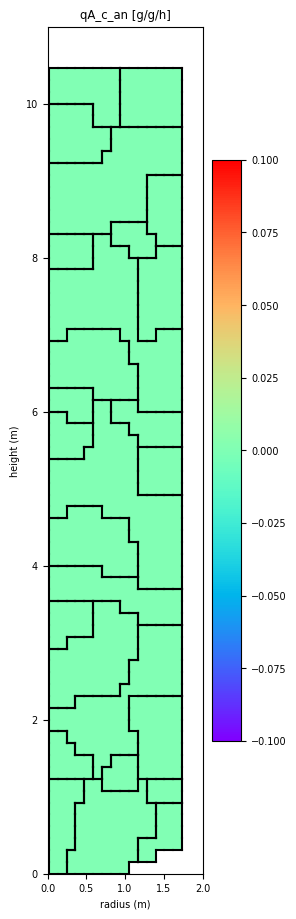

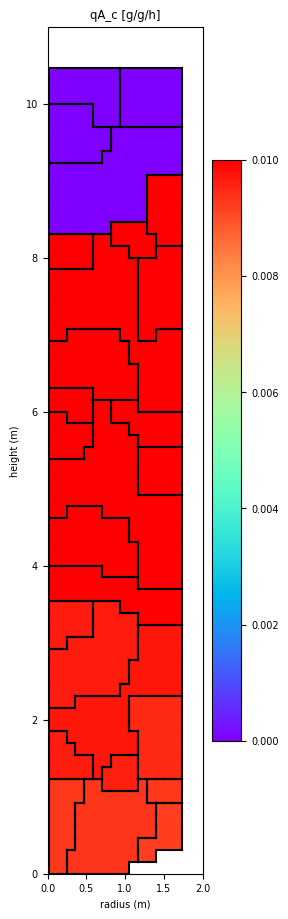

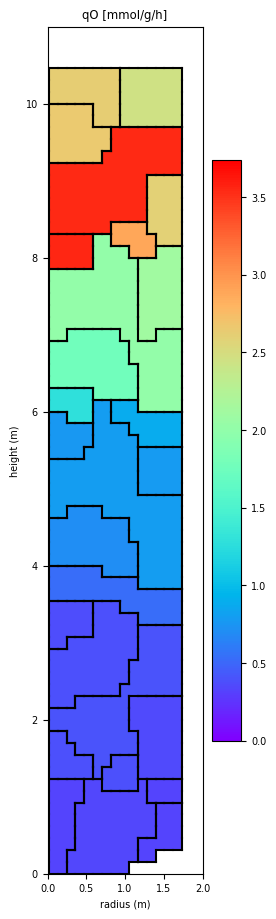

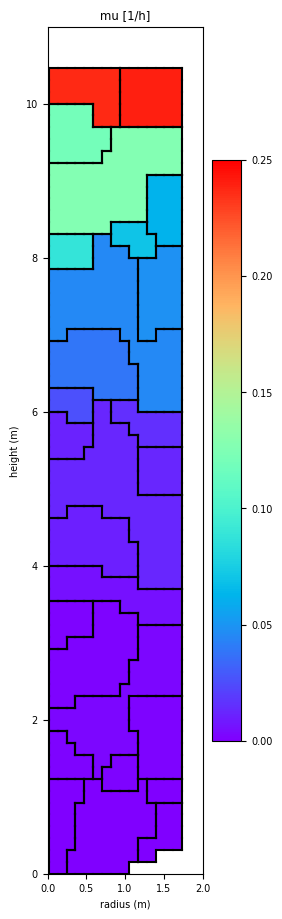

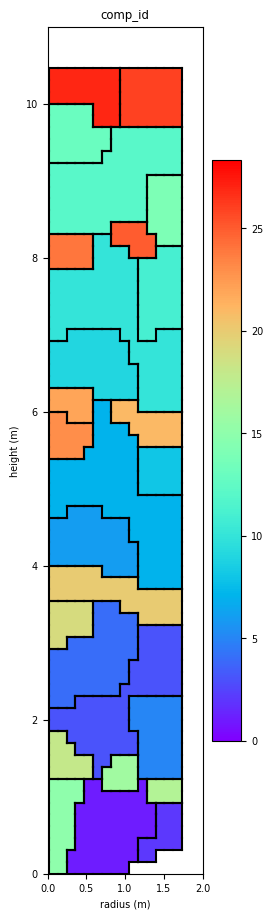

In [20]:
sol.plot_solution()

sol.plot_solution()

In [8]:
species_sumry

,X (g/L),qS (g/g/h),µ (1/h),qS_ox (g/g/h),qS_of (g/g/h),qO (mmol/L/h),qA_c (g/g/h)
1,45,0.095252,0.041838,0.065865,0.029387,1.321545,0.009102


## The chosen process condition tryptophan producer strain (TPS)

In [17]:
STR_LS_GNR = cc_cmodel(excel_path='cmodels/cmodel_files/RTD_LS/9_RTD_LS.xlsx')

In [18]:
complex_mmodel = cc_xu_bb(
    strain_id='Xu et al. 1999 literature strain',
    strain_description='HMP E. coli'
)
complex_mmodel.define_strain_params(
    #qS_max=np.mean([1.0346, 1.0549]), #np.mean([1.0536,1.0631])  1.3 ###real np.mean([1.0346, 1.0549])
    #qm_max=0.04, #0.04
    #qA_c_max=np.mean([0.05848,0.061354]), #0.15 np.mean([0.05848,0.061354])
    #qO_max=np.mean([9.0033,8.8746]), #15np.mean([7.4722,7.292]) #### real np.mean([9.0033,8.8746])
    #Ysx_ox=np.mean([0.35331,0.34492]), #0.5np.mean([0.34694,0.34227])     ### real np.mean([0.35331,0.34492])
    #Ysx_of=np.mean([0.2745, 0.27167]), #0.15np.mean([0.27253,0.27026])   ### real np.mean([0.2745, 0.27167])
    #Ysa=0.667, #np.mean([0.15666,0.16875]), #0.667
    #Yax=0, #0.4
    #Ki_s=100, #5
    #Ks=0.05, #0.05
    #Ka=0.05, #0.05
    #Ki_o=100 #4
#)
    qS_max=np.mean([1.0956, 1.1169]), #np.mean([1.0536,1.0631])  1.3 ###real np.mean([1.0346, 1.0549])
    qm_max=0, #0.04
    #qA_c_max=np.mean([0.05848,0.061354]), #0.15 np.mean([0.05848,0.061354])
    qA_c_max=np.mean([0.05636,0.06379]),
    qO_max=np.mean([9.0033,8.8746]), #15np.mean([7.4722,7.292]) #### real np.mean([9.0033,8.8746])
    Ysx_ox=np.mean([0.33364,0.3258]), #0.5np.mean([0.34694,0.34227])     ### real np.mean([0.35331,0.34492])
    Ysx_of=np.mean([0.25907, 0.25642]), #0.15np.mean([0.27253,0.27026])   ### real np.mean([0.2745, 0.27167])
    Ysa=0.667, #np.mean([0.15666,0.16875]), #0.667
    Yax=0, #0.4
    Ki_s=100, #5
    Ks=0.05, #0.05
    Ka=0.05, #0.05
    Ki_o=100 #4
)

Hello


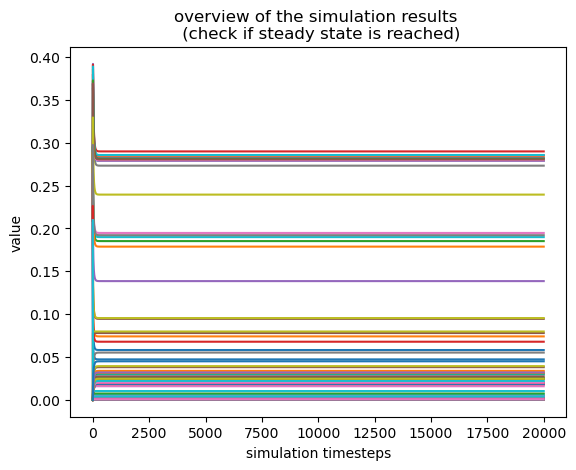

In [19]:
### The one for choosing
#df = sol.sol_df
y0_1d = [
    0.0, #S 
    0.2095, #O
    0 #A
    ]

# multiply initial values with the number of compartments
y0 = y0_1d*len(STR_LS_GNR.CompVolumes)
# simulation time
t_eval=np.linspace(0,40,20001)
# to keep things consistent: A biomass concentration of 40 g/L was chosen for Ys = 0.5; hence Ysx = 0.52 should result in 41.6. This is to keep the glucose feed rate constant accross different examples. 
# Growth rate for the fed-batch
#mu_set = 0.05
# Liquid volume in the whole reactor
VL = (STR_LS_GNR.CompVolumes.CompVol - STR_LS_GNR.CompVolumes.CompVol*STR_LS_GNR.GH.GH).sum()
# Biomass yield
Ysx = complex_mmodel.Ysx_ox
# compartment model instance
cmodel = STR_LS_GNR
#X_vector=list(range(35, 61, 5))
X = 34
    # Glucose feed rate
Fs_feed = 270000

sol = cc_cmodel_sol(
    y0 = y0,
    t_eval = t_eval, 
    mmodel = complex_mmodel, 
    cmodel = cmodel, 
    X = X, 
    Fs_feed = Fs_feed
)

In [20]:
df = sol.sol_df
Sf_pulse=500 #g/L
##Starvation
amnt_comp=27
count=0
#species_sumry.loc[2,'qS_of (g/g/h)']/species_sumry.loc[2,'qS (g/g/h)']
for i in range(len(df)):
    if df.loc[i,'qS [g/g/h]']/complex_mmodel.qS_max<0.05:
        count=count+1
    
perc_subs_starv=count/27

##Of
df['rel_vol'] = df['liquid_vol [L]']/df['liquid_vol [L]'].sum()
species_sumry=pd.DataFrame(columns=['X (g/L)','qS (g/g/h)','µ (1/h)','qS_ox (g/g/h)','qS_of (g/g/h)','qO (mmol/L/h)','qA_c (g/g/h)'])
species_sumry.loc[1,'X (g/L)']=45
species_sumry.loc[1,'qS (g/g/h)']=(df['qS [g/g/h]']*df['rel_vol']).sum()
species_sumry.loc[1,'µ (1/h)']=(df['mu [1/h]']*df['rel_vol']).sum()
species_sumry.loc[1,'qS_ox (g/g/h)']=(df['qS_ox [g/g/h]']*df['rel_vol']).sum()
species_sumry.loc[1,'qS_of (g/g/h)']=(df['qS_of [g/g/h]']*df['rel_vol']).sum()
species_sumry.loc[1,'qO (mmol/L/h)']=(df['qO [mmol/g/h]']*df['rel_vol']).sum()
species_sumry.loc[1,'qA_c (g/g/h)']=(df['qA_c [g/g/h]']*df['rel_vol']).sum()
species_sumry
perc_of=species_sumry.loc[1,'qS_of (g/g/h)']/species_sumry.loc[1,'qS (g/g/h)']

D_set=species_sumry.loc[1,'qS (g/g/h)']*X/Sf_pulse
print(D_set)
print(perc_subs_starv)
print(perc_of)


0.006613226415770997
0.6296296296296297
0.3710518799863527


C:\Users\s210212\Documents\DTU\Thesis\Python_code\Xu_IF_allvol\cmodels\cc_cmodel_sol.py:59: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = mpl.pyplot.subplots(figsize=(2.5, 11))


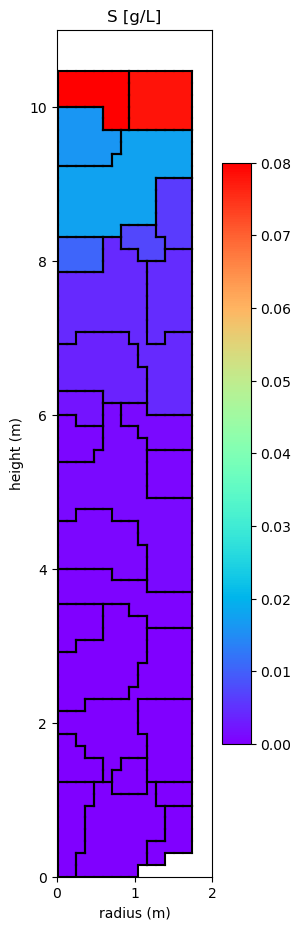

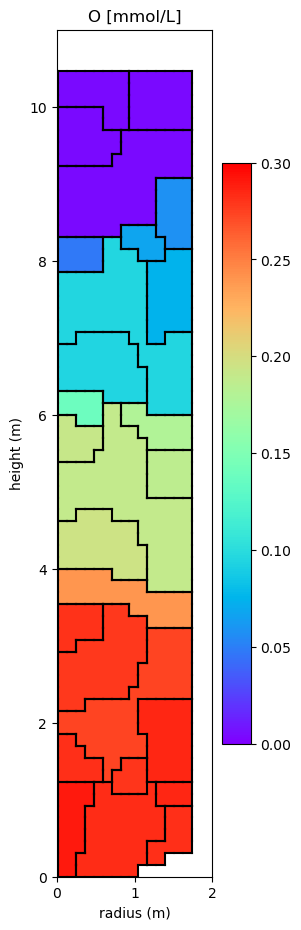

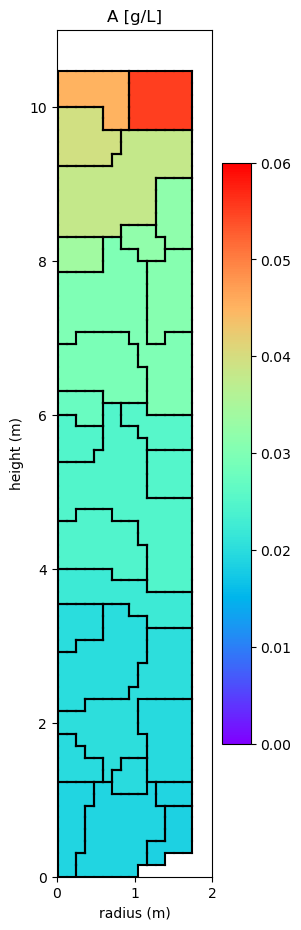

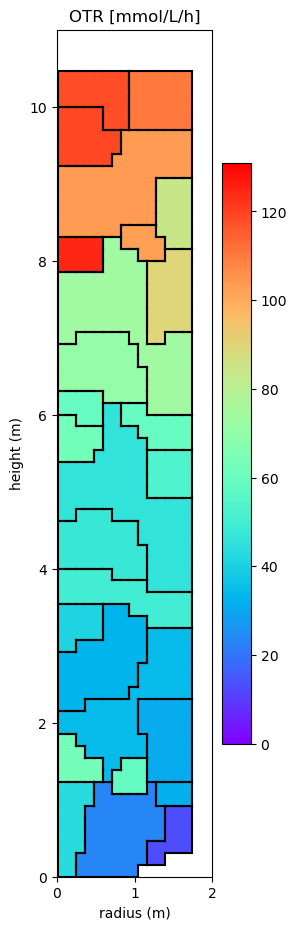

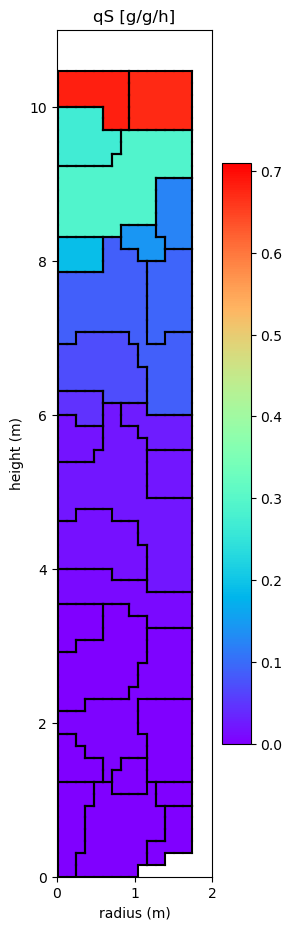

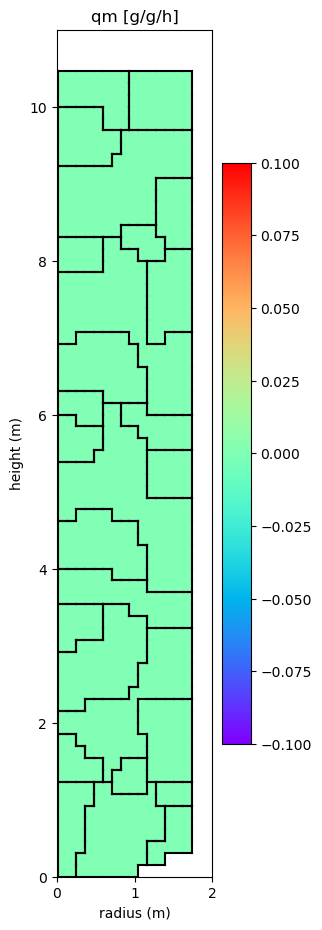

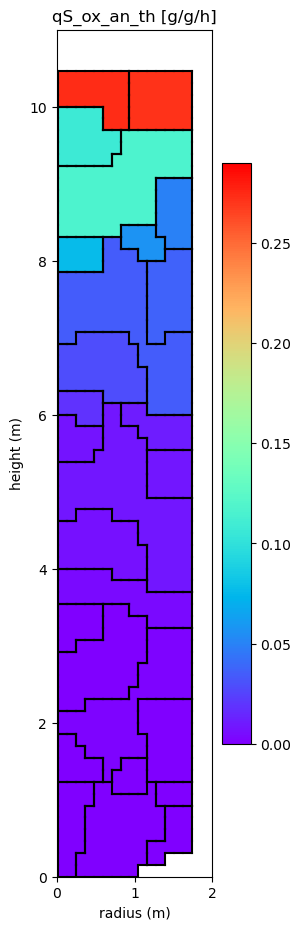

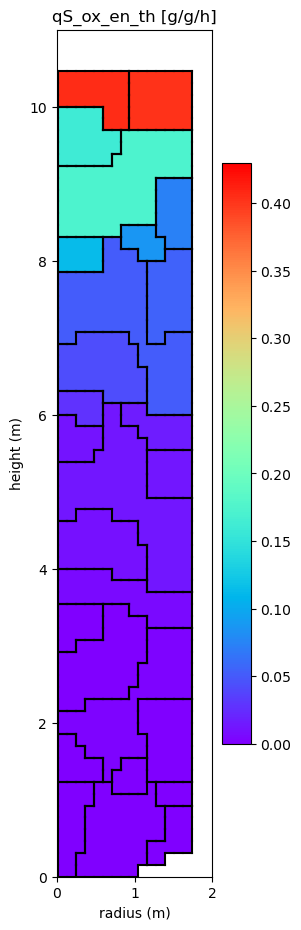

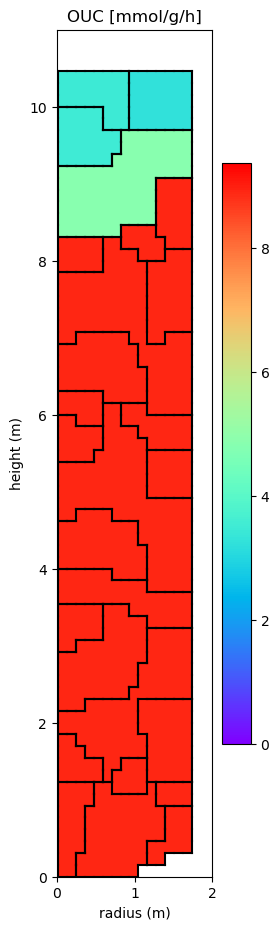

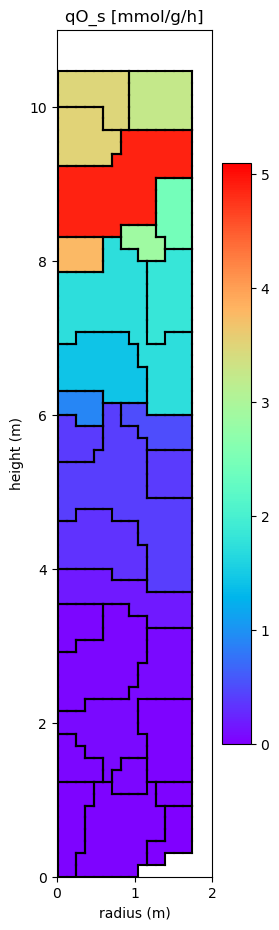

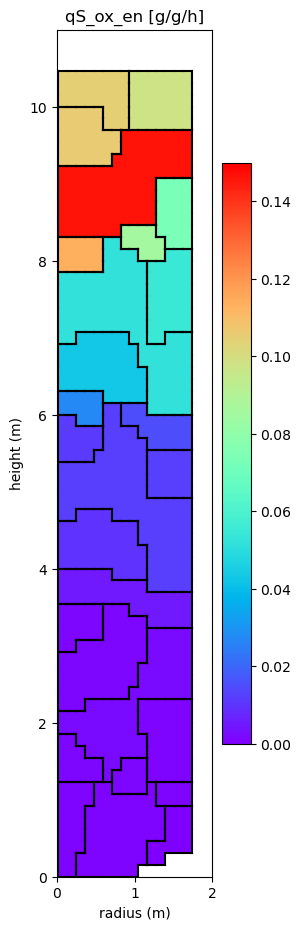

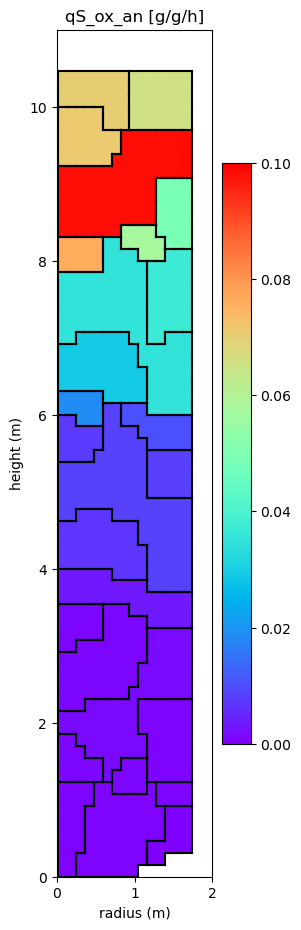

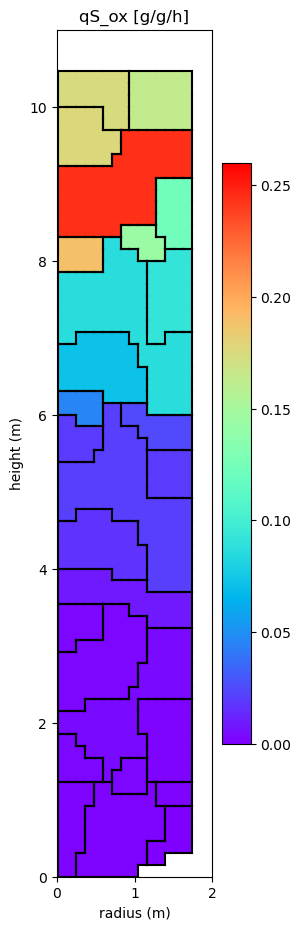

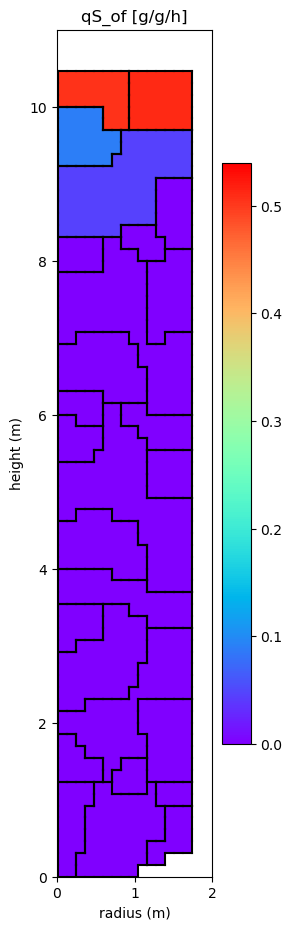

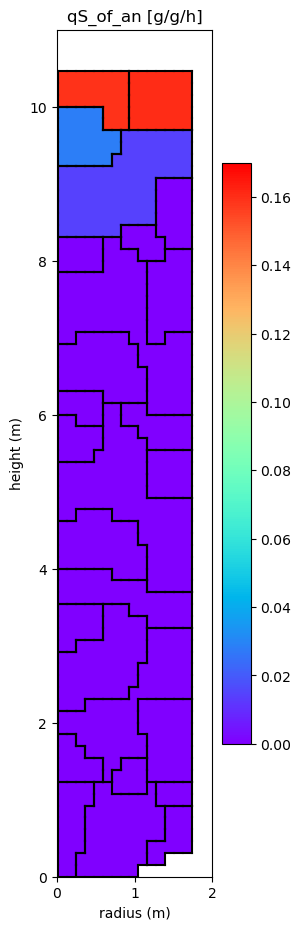

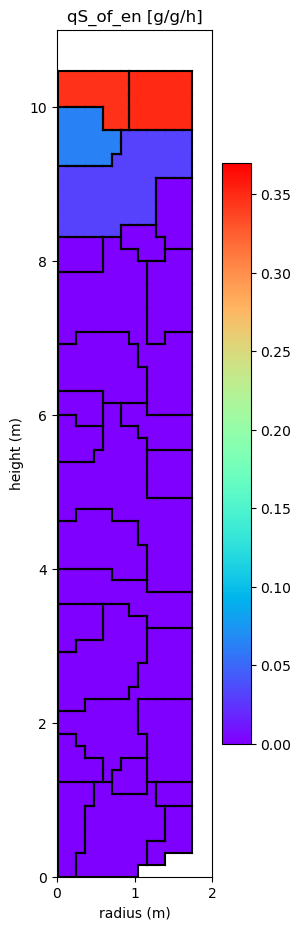

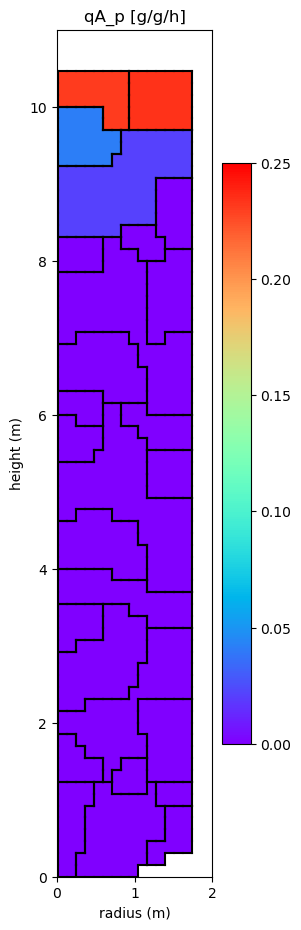

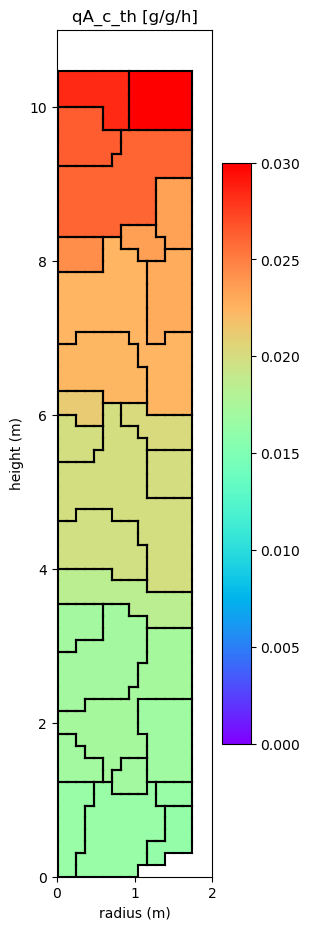

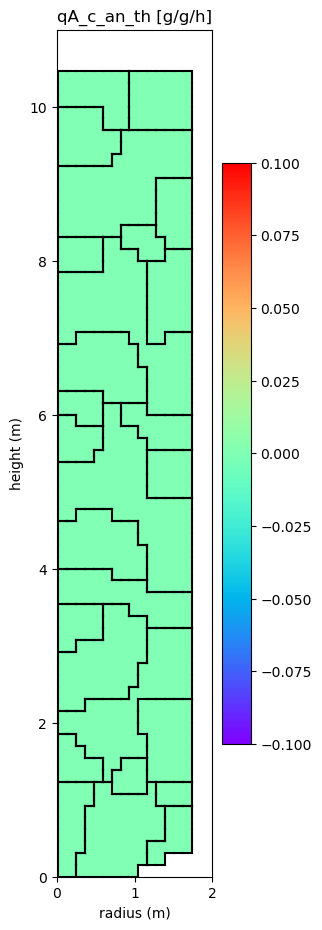

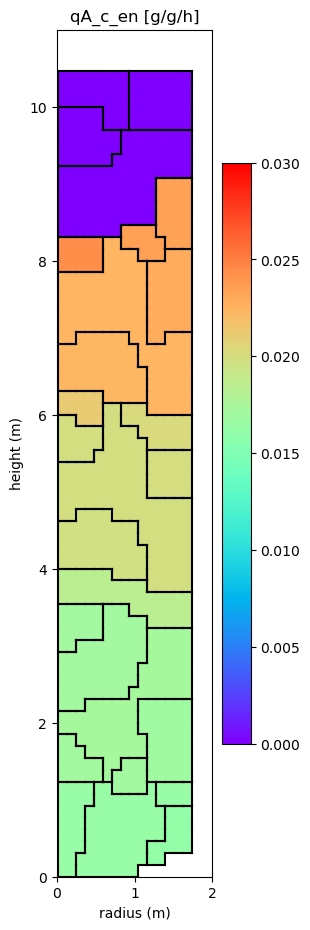

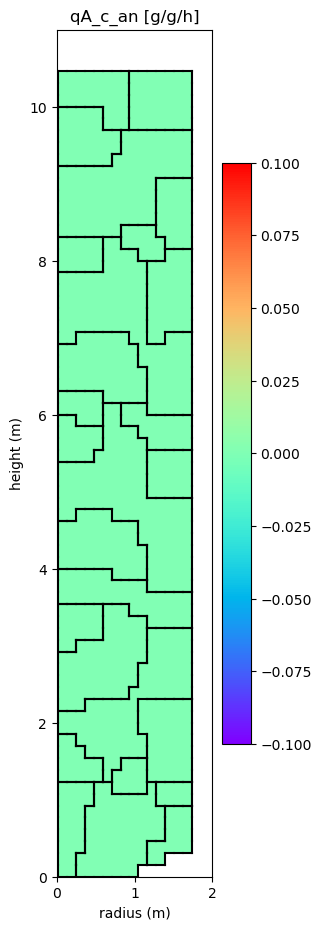

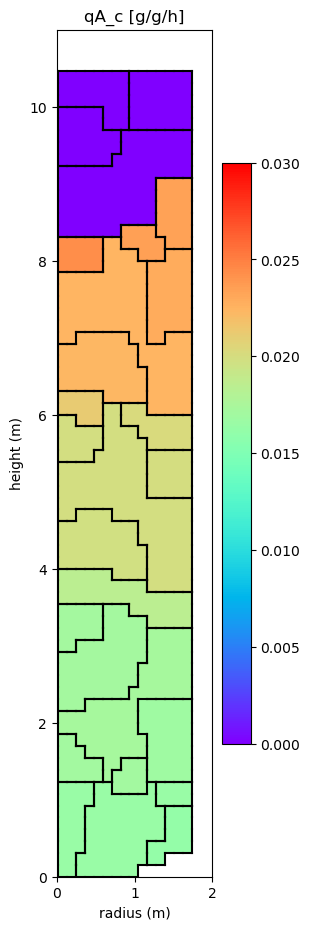

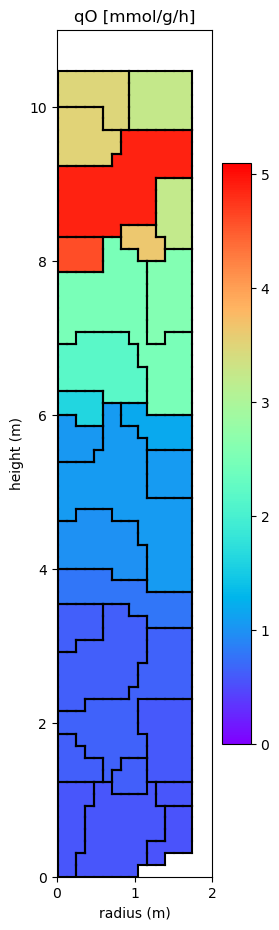

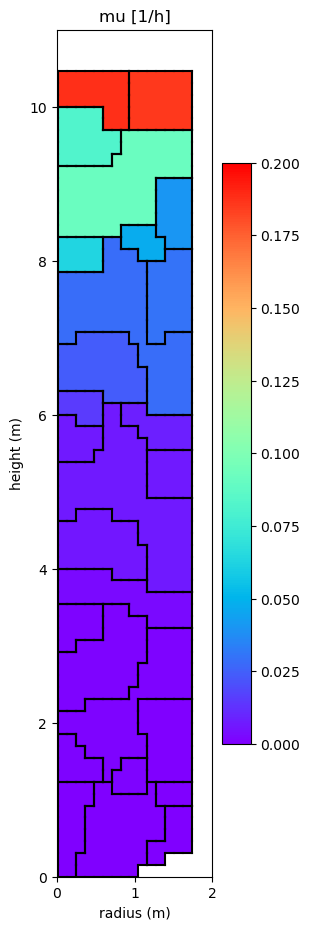

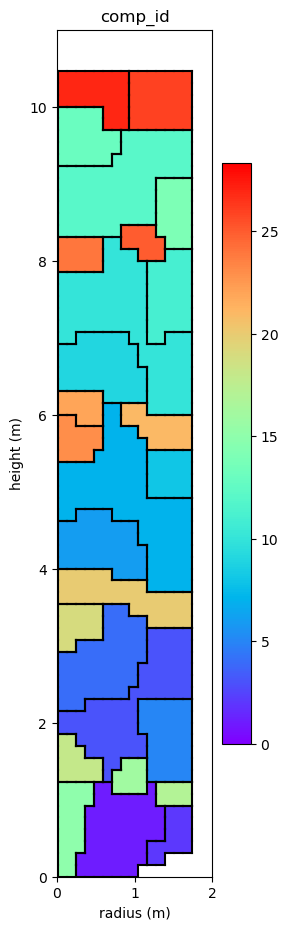

In [21]:
sol.plot_solution()

## LS WT plot starv and anaerobic ratio over biomass conc.

In [80]:
STR_LS_GNR = cc_cmodel(excel_path='cmodels/cmodel_files/RTD_LS/9_RTD_LS.xlsx')

In [81]:
complex_mmodel = cc_xu_bb(
    strain_id='Xu et al. 1999 literature strain',
    strain_description='WT E. coli'
)
complex_mmodel.define_strain_params(
    qS_max=np.mean([0.74036, 0.72265]),#np.mean([0.81528,0.7752]),## #1.3 np.mean([0.74036, 0.72265])
    qm_max=0.04, #0.04
    qA_c_max=np.mean([0.03444,0.036252]), #0.15
    qO_max=np.mean([6.7453,6.9238]), #15 np.mean([5.9305,5.8531]) np.mea(n[5.4322, 5.5012])
    Ysx_ox=np.mean([0.4592,0.4714]), # np.mean([0.4592,0.4714])    0.5 np.mean([0.41704,0.43812]) 
    Ysx_of=np.mean([0.4592,0.4714]), # np.mean([0.4592,0.4714])      0.15 np.mean([0.46473,0.50662])-np.mean([0.41704,0.43812]) np.mean([0.41704,0.43812])
    Ysa=0.667, #0.667 np.mean([0.25974,0.23213])
    Yax=0, #0.4
    Ki_s=100, #5
    Ks=0.05, #0.05
    Ka=0.05, #0.05
    Ki_o=100 #4
)

Hello
Hello
Hello
Hello
Hello
Hello


,X (g/L),qS (g/g/h),µ (1/h),qS_ox (g/g/h),qS_of (g/g/h),qO (mmol/L/h),qA_c (g/g/h)
0,35,0.122467,0.038372,0.083959,0.038508,2.135345,0.01111
1,40,0.107159,0.031249,0.067583,0.039576,1.875734,0.011418
2,45,0.095252,0.025709,0.055356,0.039896,1.647395,0.011511
3,50,0.085727,0.021277,0.04594,0.039787,1.467752,0.011479
4,55,0.077934,0.017651,0.038519,0.039415,1.327301,0.011372
5,60,0.071439,0.014629,0.032568,0.038872,1.214267,0.011215


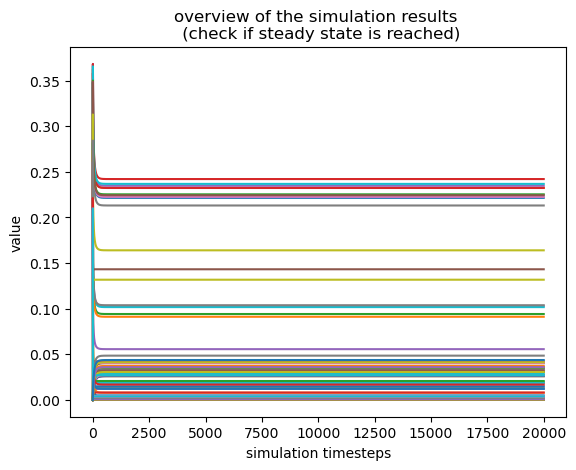

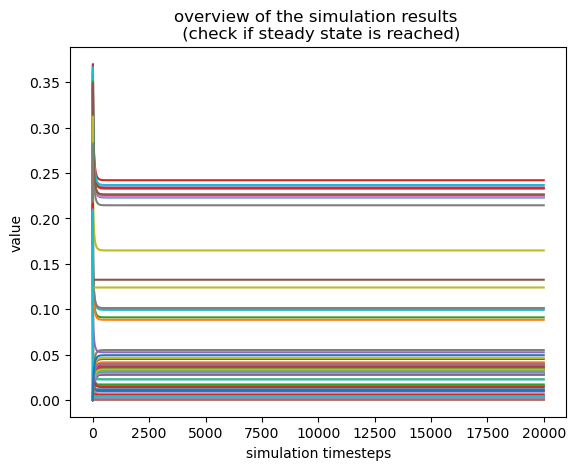

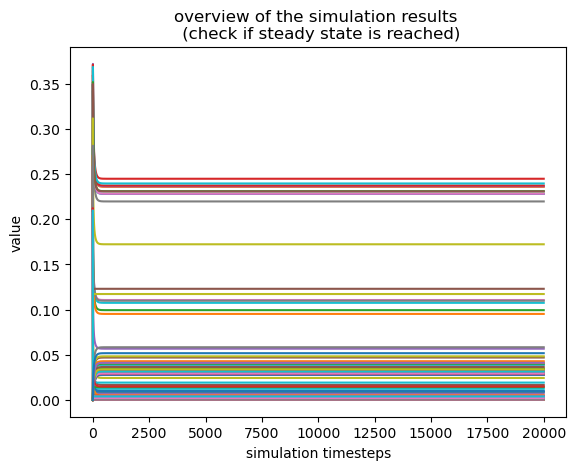

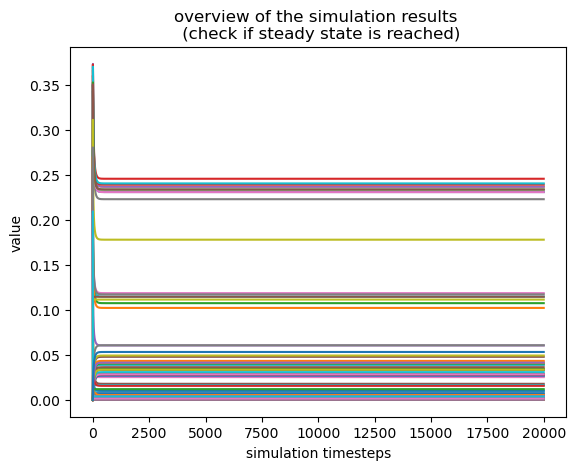

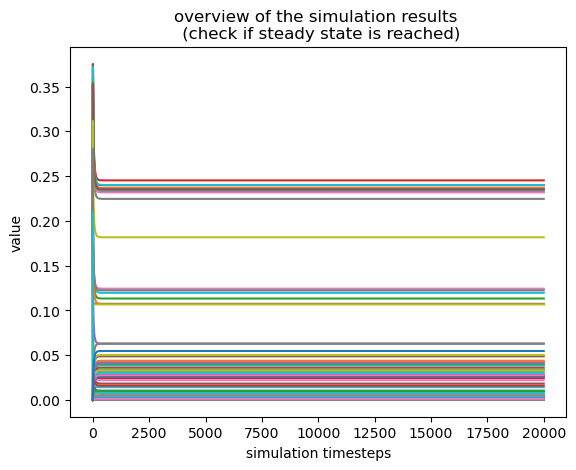

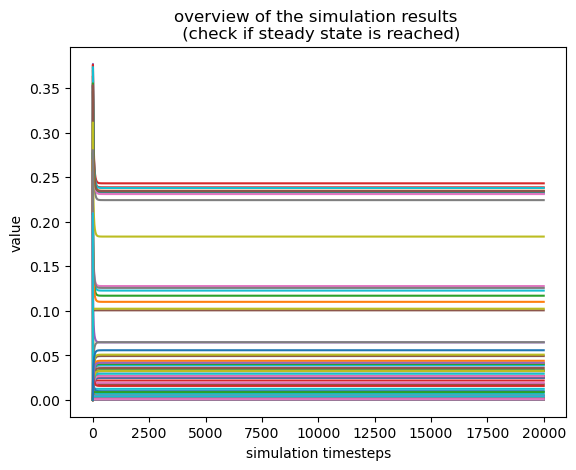

In [18]:
### Constant feed but different biomass concentration
#df = sol.sol_df
y0_1d = [
    0.0, #S 
    0.2095, #O
    0 #A
    ]

# multiply initial values with the number of compartments
y0 = y0_1d*len(STR_LS_GNR.CompVolumes)
# simulation time
t_eval=np.linspace(0,40,20001)
# to keep things consistent: A biomass concentration of 40 g/L was chosen for Ys = 0.5; hence Ysx = 0.52 should result in 41.6. This is to keep the glucose feed rate constant accross different examples. 
# Growth rate for the fed-batch
mu_set = 0.05
# Liquid volume in the whole reactor
VL = (STR_LS_GNR.CompVolumes.CompVol - STR_LS_GNR.CompVolumes.CompVol*STR_LS_GNR.GH.GH).sum()
# Biomass yield
Ysx = complex_mmodel.Ysx_ox
# compartment model instance
cmodel = STR_LS_GNR
X_vector=list(range(35, 71, 5))
species_sumry=pd.DataFrame(columns=['X (g/L)','qS (g/g/h)','µ (1/h)','qS_ox (g/g/h)','qS_of (g/g/h)','qO (mmol/L/h)','qA_c (g/g/h)'])
for i in range(len(X_vector)):
    # Biomass concentration 
    X = X_vector[i] 
    # Glucose feed rate
    #Fs_feed = mu_set/Ysx*X*VL*1000
    Fs_feed=350000 #gS/h 400000 gS/h looks good!

    sol = cc_cmodel_sol(
        y0 = y0,
        t_eval = t_eval, 
        mmodel = complex_mmodel, 
        cmodel = cmodel, 
        X = X, 
        Fs_feed = Fs_feed
    )
    df = sol.sol_df
    df['rel_vol'] = df['liquid_vol [L]']/df['liquid_vol [L]'].sum()
    species_sumry.loc[i,'X (g/L)']=X_vector[i]
    species_sumry.loc[i,'qS (g/g/h)']=(df['qS [g/g/h]']*df['rel_vol']).sum()
    species_sumry.loc[i,'µ (1/h)']=(df['mu [1/h]']*df['rel_vol']).sum()
    species_sumry.loc[i,'qS_ox (g/g/h)']=(df['qS_ox [g/g/h]']*df['rel_vol']).sum()
    species_sumry.loc[i,'qS_of (g/g/h)']=(df['qS_of [g/g/h]']*df['rel_vol']).sum()
    species_sumry.loc[i,'qO (mmol/L/h)']=(df['qO [mmol/g/h]']*df['rel_vol']).sum()
    species_sumry.loc[i,'qA_c (g/g/h)']=(df['qA_c [g/g/h]']*df['rel_vol']).sum()
    
species_sumry

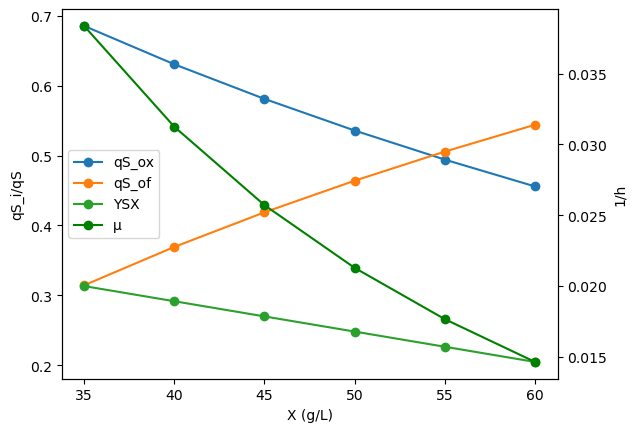

0    0.038372
1    0.031249
2    0.025709
3    0.021277
4    0.017651
5    0.014629
Name: µ (1/h), dtype: object

In [19]:
# Create the figure and two axes objects
fig,ax1=plt.subplots()
# Make a second axes that shares the same x-axis
ax2 = ax1.twinx()
# Plot the first data series on the first axis
ax1.plot(species_sumry['X (g/L)'],species_sumry['qS_ox (g/g/h)']/species_sumry['qS (g/g/h)'],'o-',label='qS_ox')
ax1.plot(species_sumry['X (g/L)'],species_sumry['qS_of (g/g/h)']/species_sumry['qS (g/g/h)'],'o-',label='qS_of')
ax1.plot(species_sumry['X (g/L)'],species_sumry['µ (1/h)']/species_sumry['qS (g/g/h)'],'o-',label='YSX')
ax1.set_xlabel('X (g/L)')
ax1.set_ylabel('qS_i/qS')
# Plot the second data series on the second axis
ax2.plot(species_sumry['X (g/L)'],species_sumry['µ (1/h)'],'go-',label='µ')
ax2.set_ylabel('1/h')

# Add a legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels, loc='center left')

# Show the plot
plt.show()

species_sumry['µ (1/h)']

#plt.plot(species_sumry['X (g/L)'],species_sumry['qS (g/g/h)'],'o-')

# BM (base mode) process parameter definition WT

In [47]:
STR_LS_GNR = cc_cmodel(excel_path='cmodels/cmodel_files/RTD_BM/9_RTD_BM.xlsx')

In [48]:
complex_mmodel = cc_xu_bb(
    strain_id='Xu et al. 1999 literature strain',
    strain_description='WT E. coli'
)
complex_mmodel.define_strain_params(
    qS_max=np.mean([0.74036, 0.72265]),#np.mean([0.81528,0.7752]),## #1.3 np.mean([0.74036, 0.72265])
    qm_max=0.04, #0.04
    qA_c_max=np.mean([0.03444,0.036252]), #0.15
    qO_max=np.mean([6.7453,6.9238]), #15 np.mean([5.9305,5.8531]) np.mea(n[5.4322, 5.5012])
    Ysx_ox=np.mean([0.4592,0.4714]), # np.mean([0.4592,0.4714])    0.5 np.mean([0.41704,0.43812]) 
    Ysx_of=np.mean([0.4592,0.4714]), # np.mean([0.4592,0.4714])      0.15 np.mean([0.46473,0.50662])-np.mean([0.41704,0.43812]) np.mean([0.41704,0.43812])
    Ysa=0.667, #0.667 np.mean([0.25974,0.23213])
    Yax=0, #0.4
    Ki_s=100, #5
    Ks=0.05, #0.05
    Ka=0.05, #0.05
    Ki_o=100 #4
)

Hello
Hello
Hello
Hello
Hello
Hello


,X (g/L),qS (g/g/h),µ (1/h),qS_ox (g/g/h),qS_of (g/g/h),qO (mmol/L/h),qA_c (g/g/h)
0,35,0.125908,0.039973,0.120034,0.005874,2.419229,0.001695
1,40,0.11017,0.03265,0.104683,0.005487,2.144728,0.001583
2,45,0.097929,0.026954,0.092811,0.005117,1.928899,0.001476
3,50,0.088136,0.022398,0.083376,0.00476,1.741848,0.001373
4,55,0.080123,0.018669,0.075711,0.004413,1.587621,0.001273
5,60,0.073446,0.015563,0.069372,0.004075,1.462755,0.001176


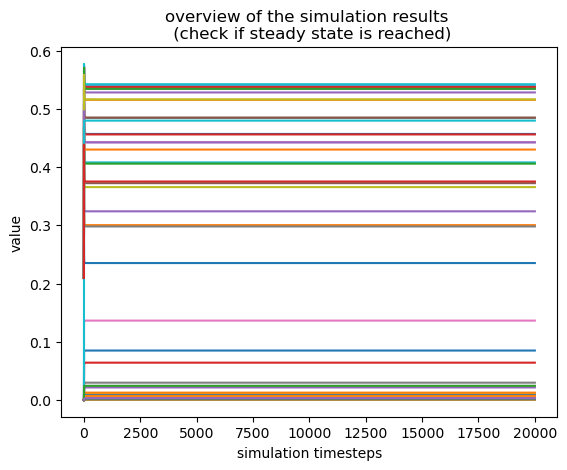

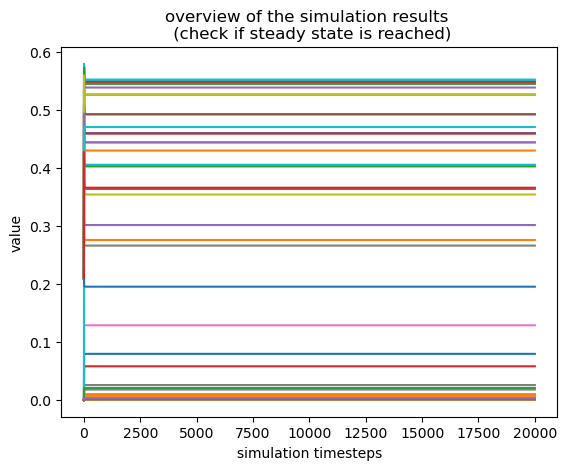

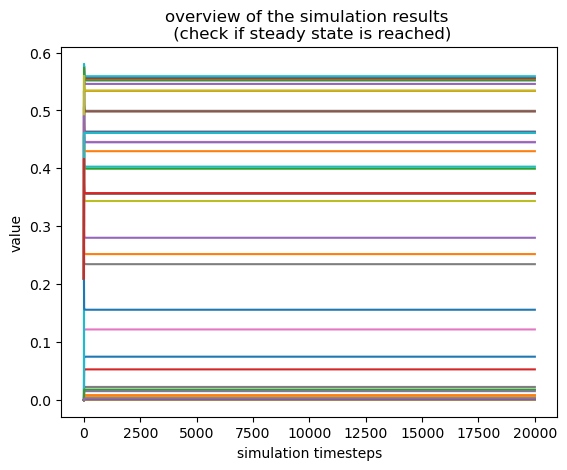

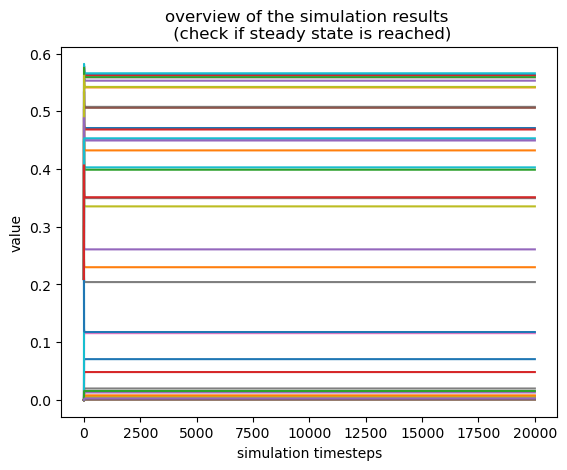

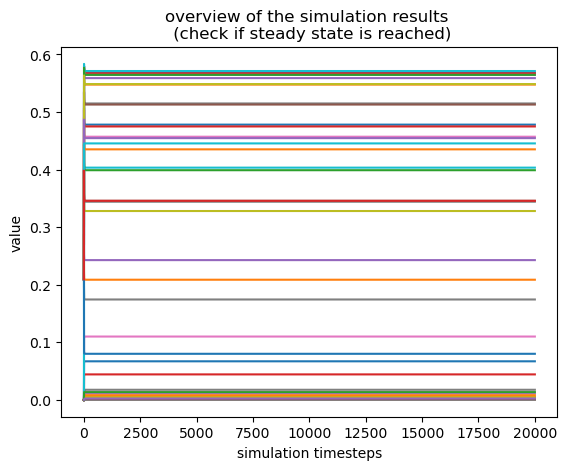

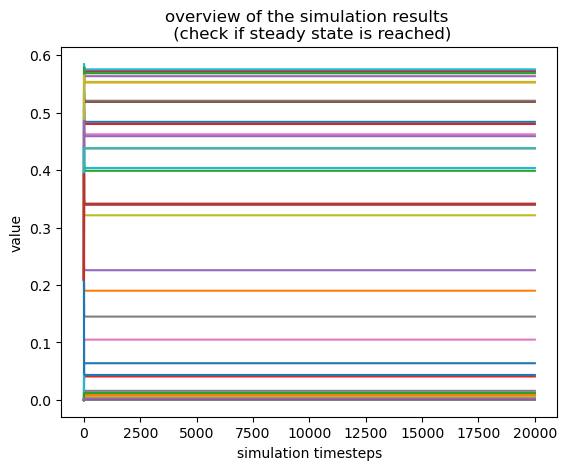

In [49]:
### The one for choosing
#df = sol.sol_df
y0_1d = [
    0.0, #S 
    0.2095, #O
    0 #A
    ]

# multiply initial values with the number of compartments
y0 = y0_1d*len(STR_LS_GNR.CompVolumes)
# simulation time
t_eval=np.linspace(0,40,20001)
# to keep things consistent: A biomass concentration of 40 g/L was chosen for Ys = 0.5; hence Ysx = 0.52 should result in 41.6. This is to keep the glucose feed rate constant accross different examples. 
# Growth rate for the fed-batch
mu_set = 0.05
# Liquid volume in the whole reactor
VL = (STR_LS_GNR.CompVolumes.CompVol - STR_LS_GNR.CompVolumes.CompVol*STR_LS_GNR.GH.GH).sum()
# Biomass yield
Ysx = complex_mmodel.Ysx_ox
# compartment model instance
cmodel = STR_LS_GNR
X_vector=list(range(35, 61, 5))
species_sumry=pd.DataFrame(columns=['X (g/L)','qS (g/g/h)','µ (1/h)','qS_ox (g/g/h)','qS_of (g/g/h)','qO (mmol/L/h)','qA_c (g/g/h)'])
for i in range(len(X_vector)):
    # Biomass concentration 
    X = X_vector[i] 
    # Glucose feed rate
    #Fs_feed = mu_set/Ysx*X*VL*1000
    Fs_feed=350000

    sol = cc_cmodel_sol(
        y0 = y0,
        t_eval = t_eval, 
        mmodel = complex_mmodel, 
        cmodel = cmodel, 
        X = X, 
        Fs_feed = Fs_feed
    )
    df = sol.sol_df
    df['rel_vol'] = df['liquid_vol [L]']/df['liquid_vol [L]'].sum()
    species_sumry.loc[i,'X (g/L)']=X_vector[i]
    species_sumry.loc[i,'qS (g/g/h)']=(df['qS [g/g/h]']*df['rel_vol']).sum()
    species_sumry.loc[i,'µ (1/h)']=(df['mu [1/h]']*df['rel_vol']).sum()
    species_sumry.loc[i,'qS_ox (g/g/h)']=(df['qS_ox [g/g/h]']*df['rel_vol']).sum()
    species_sumry.loc[i,'qS_of (g/g/h)']=(df['qS_of [g/g/h]']*df['rel_vol']).sum()
    species_sumry.loc[i,'qO (mmol/L/h)']=(df['qO [mmol/g/h]']*df['rel_vol']).sum()
    species_sumry.loc[i,'qA_c (g/g/h)']=(df['qA_c [g/g/h]']*df['rel_vol']).sum()
    
species_sumry

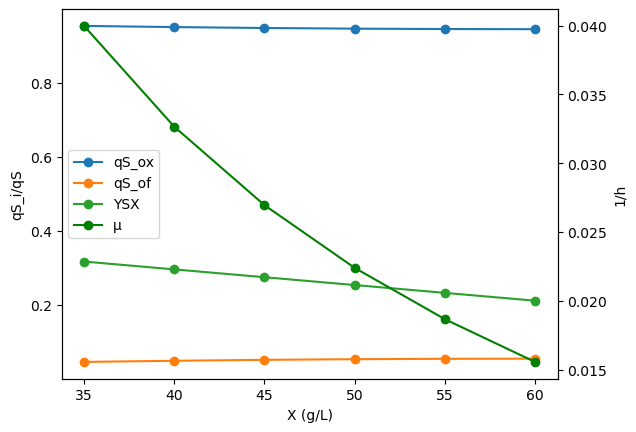

0    0.039973
1     0.03265
2    0.026954
3    0.022398
4    0.018669
5    0.015563
Name: µ (1/h), dtype: object

In [50]:
# Create the figure and two axes objects
fig,ax1=plt.subplots()
# Make a second axes that shares the same x-axis
ax2 = ax1.twinx()
# Plot the first data series on the first axis
ax1.plot(species_sumry['X (g/L)'],species_sumry['qS_ox (g/g/h)']/species_sumry['qS (g/g/h)'],'o-',label='qS_ox')
ax1.plot(species_sumry['X (g/L)'],species_sumry['qS_of (g/g/h)']/species_sumry['qS (g/g/h)'],'o-',label='qS_of')
ax1.plot(species_sumry['X (g/L)'],species_sumry['µ (1/h)']/species_sumry['qS (g/g/h)'],'o-',label='YSX')
ax1.set_xlabel('X (g/L)')
ax1.set_ylabel('qS_i/qS')
# Plot the second data series on the second axis
ax2.plot(species_sumry['X (g/L)'],species_sumry['µ (1/h)'],'go-',label='µ')
ax2.set_ylabel('1/h')

# Add a legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels, loc='center left')

# Show the plot
plt.show()

species_sumry['µ (1/h)']

#plt.plot(species_sumry['X (g/L)'],species_sumry['qS (g/g/h)'],'o-')

# BM process parameter definition TPS

In [5]:
STR_LS_GNR = cc_cmodel(excel_path='cmodels/cmodel_files/RTD_LS/9_RTD_BM.xlsx')

In [17]:
complex_mmodel = cc_xu_bb(
    strain_id='Xu et al. 1999 literature strain',
    strain_description='HMP E. coli'
)
complex_mmodel.define_strain_params(
    qS_max=np.mean([1.0346, 1.0549]), #np.mean([1.0536,1.0631])  1.3 ###real np.mean([1.0346, 1.0549])
    qm_max=0.04, #0.04
    qA_c_max=np.mean([0.05848,0.061354]), #0.15 np.mean([0.05848,0.061354])
    qO_max=np.mean([9.0033,8.8746]), #15np.mean([7.4722,7.292]) #### real np.mean([9.0033,8.8746])
    Ysx_ox=np.mean([0.35331,0.34492]), #0.5np.mean([0.34694,0.34227])     ### real np.mean([0.35331,0.34492])
    Ysx_of=np.mean([0.2745, 0.27167]), #0.15np.mean([0.27253,0.27026])   ### real np.mean([0.2745, 0.27167])
    Ysa=0.667, #np.mean([0.15666,0.16875]), #0.667
    Yax=0, #0.4
    Ki_s=100, #5
    Ks=0.05, #0.05
    Ka=0.05, #0.05
    Ki_o=100 #4
)

In [ ]:
### The one for choosing
#df = sol.sol_df
y0_1d = [
    0.0, #S 
    0.2095, #O
    0 #A
    ]

# multiply initial values with the number of compartments
y0 = y0_1d*len(STR_LS_GNR.CompVolumes)
# simulation time
t_eval=np.linspace(0,40,20001)
# to keep things consistent: A biomass concentration of 40 g/L was chosen for Ys = 0.5; hence Ysx = 0.52 should result in 41.6. This is to keep the glucose feed rate constant accross different examples. 
# Growth rate for the fed-batch
mu_set = 0.05
# Liquid volume in the whole reactor
VL = (STR_LS_GNR.CompVolumes.CompVol - STR_LS_GNR.CompVolumes.CompVol*STR_LS_GNR.GH.GH).sum()
# Biomass yield
Ysx = complex_mmodel.Ysx_ox
# compartment model instance
cmodel = STR_LS_GNR
X_vector=list(range(35, 61, 5))
species_sumry=pd.DataFrame(columns=['X (g/L)','qS (g/g/h)','µ (1/h)','qS_ox (g/g/h)','qS_of (g/g/h)','qO (mmol/L/h)','qA_c (g/g/h)'])
for i in range(len(X_vector)):
    # Biomass concentration 
    X = X_vector[i] 
    # Glucose feed rate
    Fs_feed = mu_set/Ysx*X*VL*1000

    sol = cc_cmodel_sol(
        y0 = y0,
        t_eval = t_eval, 
        mmodel = complex_mmodel, 
        cmodel = cmodel, 
        X = X, 
        Fs_feed = Fs_feed
    )
    df = sol.sol_df
    df['rel_vol'] = df['liquid_vol [L]']/df['liquid_vol [L]'].sum()
    species_sumry.loc[i,'X (g/L)']=X_vector[i]
    species_sumry.loc[i,'qS (g/g/h)']=(df['qS [g/g/h]']*df['rel_vol']).sum()
    species_sumry.loc[i,'µ (1/h)']=(df['mu [1/h]']*df['rel_vol']).sum()
    species_sumry.loc[i,'qS_ox (g/g/h)']=(df['qS_ox [g/g/h]']*df['rel_vol']).sum()
    species_sumry.loc[i,'qS_of (g/g/h)']=(df['qS_of [g/g/h]']*df['rel_vol']).sum()
    species_sumry.loc[i,'qO (mmol/L/h)']=(df['qO [mmol/g/h]']*df['rel_vol']).sum()
    species_sumry.loc[i,'qA_c (g/g/h)']=(df['qA_c [g/g/h]']*df['rel_vol']).sum()
    
species_sumry

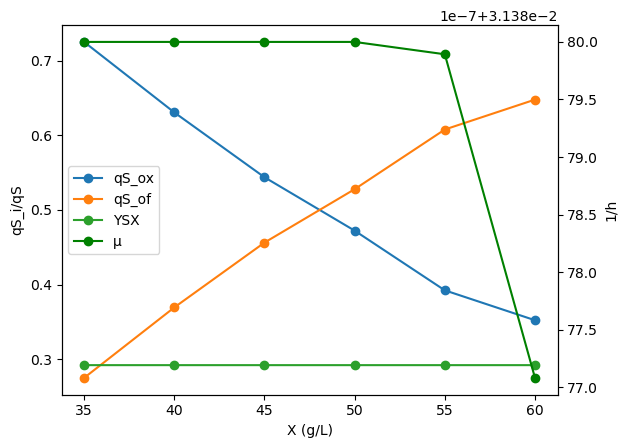

0    0.031388
1    0.031388
2    0.031388
3    0.031388
4    0.031388
5    0.031388
Name: µ (1/h), dtype: object

In [15]:
# Create the figure and two axes objects
fig,ax1=plt.subplots()
# Make a second axes that shares the same x-axis
ax2 = ax1.twinx()
# Plot the first data series on the first axis
ax1.plot(species_sumry['X (g/L)'],species_sumry['qS_ox (g/g/h)']/species_sumry['qS (g/g/h)'],'o-',label='qS_ox')
ax1.plot(species_sumry['X (g/L)'],species_sumry['qS_of (g/g/h)']/species_sumry['qS (g/g/h)'],'o-',label='qS_of')
ax1.plot(species_sumry['X (g/L)'],species_sumry['µ (1/h)']/species_sumry['qS (g/g/h)'],'o-',label='YSX')
ax1.set_xlabel('X (g/L)')
ax1.set_ylabel('qS_i/qS')
# Plot the second data series on the second axis
ax2.plot(species_sumry['X (g/L)'],species_sumry['µ (1/h)'],'go-',label='µ')
ax2.set_ylabel('1/h')

# Add a legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels, loc='center left')

# Show the plot
plt.show()

species_sumry['µ (1/h)']

#plt.plot(species_sumry['X (g/L)'],species_sumry['qS (g/g/h)'],'o-')

# Average without relation to volume

In [ ]:
y0_1d = [
    0.0, #S 
    0.2095, #O
    0 #A
    ]

# multiply initial values with the number of compartments
y0 = y0_1d*len(STR_LS_GNR.CompVolumes)
# simulation time
t_eval=np.linspace(0,1,5001)
# to keep things consistent: A biomass concentration of 40 g/L was chosen for Ys = 0.5; hence Ysx = 0.52 should result in 41.6. This is to keep the glucose feed rate constant accross different examples. 
# Growth rate for the fed-batch
mu_set = 0.05
# Liquid volume in the whole reactor
VL = (STR_LS_GNR.CompVolumes.CompVol - STR_LS_GNR.CompVolumes.CompVol*STR_LS_GNR.GH.GH).sum()
# Biomass yield
Ysx = complex_mmodel.Ysx_ox
# compartment model instance
cmodel = STR_LS_GNR
X_vector=list(range(20, 71, 5))
species_sumry=pd.DataFrame(columns=['X (g/L)','qS (g/g/h)','µ (1/h)','qS_ox (g/g/h)','qS_of (g/g/h)','qO (mmol/L/h)','qA_c (g/g/h)'])
for i in range(len(X_vector)):
    # Biomass concentration 
    X = X_vector[i] 
    # Glucose feed rate
    Fs_feed = mu_set/Ysx*X*VL*1000

    sol = cc_cmodel_sol(
        y0 = y0,
        t_eval = t_eval, 
        mmodel = complex_mmodel, 
        cmodel = cmodel, 
        X = X, 
        Fs_feed = Fs_feed
    )
    species_sumry.loc[i,'X (g/L)']=X_vector[i]
    species_sumry.loc[i,'qS (g/g/h)']=sol.sol_df_avg[4]
    species_sumry.loc[i,'µ (1/h)']=sol.sol_df_avg[23]
    species_sumry.loc[i,'qS_ox (g/g/h)']=sol.sol_df_avg[12]
    species_sumry.loc[i,'qS_of (g/g/h)']=sol.sol_df_avg[13]
    species_sumry.loc[i,'qO (mmol/L/h)']=sol.sol_df_avg[22]
    species_sumry.loc[i,'qA_c (g/g/h)']=sol.sol_df_avg[21]
    
species_sumry

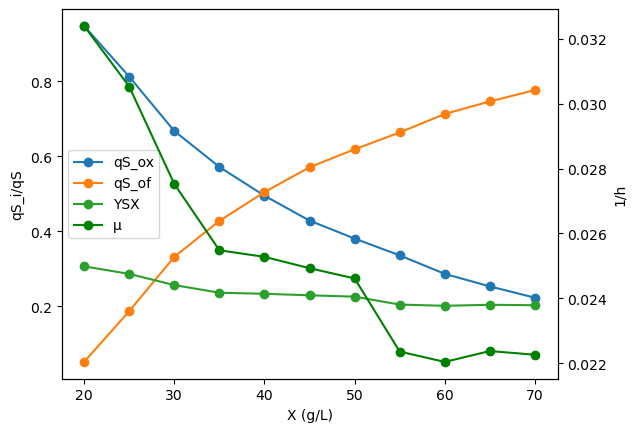

In [17]:

#plt.plot(species_sumry['X (g/L)'],species_sumry['qS_ox (g/g/h)']/species_sumry['qS (g/g/h)'],'o-',label='qS_ox')
#plt.plot(species_sumry['X (g/L)'],species_sumry['qS_of (g/g/h)']/species_sumry['qS (g/g/h)'],'o-',label='qS_of')
#plt.plot(species_sumry['X (g/L)'],species_sumry['µ (1/h)'],'o-',label='µ')
#plt.xlabel('X (g/L)')
#plt.ylabel('qS_i/qS')
#plt.legend()

# Create the figure and two axes objects
fig,ax1=plt.subplots()
# Make a second axes that shares the same x-axis
ax2 = ax1.twinx()
# Plot the first data series on the first axis
ax1.plot(species_sumry['X (g/L)'],species_sumry['qS_ox (g/g/h)']/species_sumry['qS (g/g/h)'],'o-',label='qS_ox')
ax1.plot(species_sumry['X (g/L)'],species_sumry['qS_of (g/g/h)']/species_sumry['qS (g/g/h)'],'o-',label='qS_of')
ax1.plot(species_sumry['X (g/L)'],species_sumry['µ (1/h)']/species_sumry['qS (g/g/h)'],'o-',label='YSX')
ax1.set_xlabel('X (g/L)')
ax1.set_ylabel('qS_i/qS')
# Plot the second data series on the second axis
ax2.plot(species_sumry['X (g/L)'],species_sumry['µ (1/h)'],'go-',label='µ')
ax2.set_ylabel('1/h')

# Add a legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels, loc='center left')

# Show the plot
plt.show()


#plt.plot(species_sumry['X (g/L)'],species_sumry['qS (g/g/h)'],'o-')